# Imports


In [361]:
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display, Markdown
from tabulate import tabulate

# Funciones Auxiliares


In [362]:
def time_to_seconds(t):
    """
    Converts a time string in the format hh:mm:ss, mm:ss, mm:ss.xx, or ss.xx to total seconds.

    Args:
        t (str): Time as a string in one of the following formats:
            - 'hh:mm:ss'
            - 'mm:ss'
            - 'mm:ss.xx'
            - 'ss.xx'

    Returns:
        float: Total time in seconds, or None if input is NaN.
    """
    if pd.isna(t):
        return None
    parts = t.split(':')
    if len(parts) == 3:
        hours = int(parts[0])
        minutes = int(parts[1])
        seconds = float(parts[2])
        return hours * 3600 + minutes * 60 + seconds
    elif len(parts) == 2:
        minutes = int(parts[0])
        seconds = float(parts[1])
        return minutes * 60 + seconds
    else:
        return float(t)

# Experimentos

Estos experimentos nos ayudarán a elegir los mejores parámetros del programa HPMoon de cara a poder realizar los estudios posteriores.

## Determinación del número óptimo de subpoblaciones

Entre los parámetros del programa HPMoon, uno de los más importantes es el número de subpoblaciones


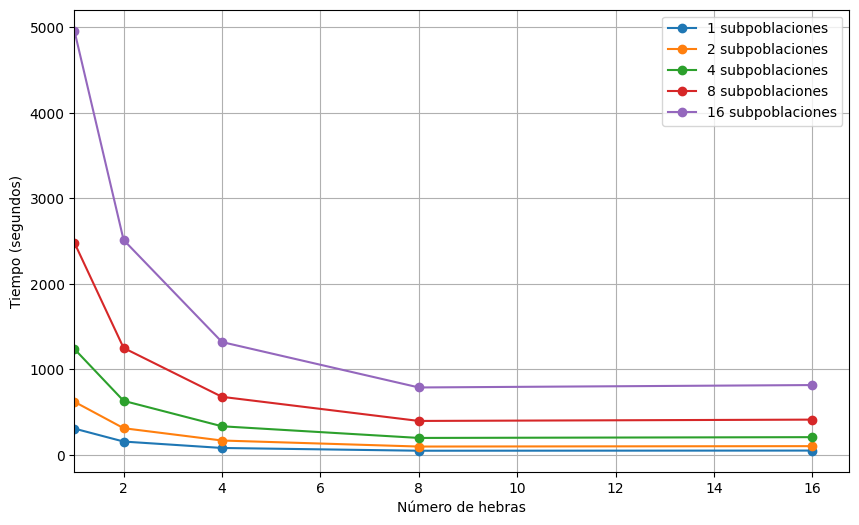

In [363]:
subpops_list = [1, 2, 4, 8, 16]
plt.figure(figsize=(10, 6))

for n_subpops in subpops_list:
    file_path = f'../results/experiments/ubuntu_native_{n_subpops}subpops.csv'
    try:
        df = pd.read_csv(file_path)
        df['time_seconds'] = df['time'].apply(time_to_seconds)
        plt.plot(df['threads'], df['time_seconds'], marker='o', label=f'{n_subpops} subpoblaciones')
    except FileNotFoundError:
        print(f'Archivo no encontrado: {file_path}')

plt.xlabel('Número de hebras')
plt.ylabel('Tiempo (segundos)')
# plt.title('Tiempo vs Número de hebras para distintos números de subpoblaciones')
plt.legend()
plt.grid(True)
plt.xlim(left=1)  # There is 1 thread at least
plt.show()

In [364]:
subpops_list = [1, 2, 4, 8, 16]
resultados = []

for n_subpops in subpops_list:
    file_path = f'../results/experiments/ubuntu_native_{n_subpops}subpops.csv'
    try:
        df = pd.read_csv(file_path)
        df['time_seconds'] = df['time'].apply(time_to_seconds)
        for _, row in df.iterrows():
            resultados.append({
                'Subpoblaciones': n_subpops,
                'Hebras': row['threads'],
                'Tiempo (segundos)': row['time_seconds']
            })
    except FileNotFoundError:
        print(f'Archivo no encontrado: {file_path}')

tabla = pd.DataFrame(resultados)
tabla = tabla.sort_values(['Subpoblaciones', 'Hebras']).reset_index(drop=True)
display(Markdown(tabla.to_markdown(index=False, floatfmt=".2f")))

|   Subpoblaciones |   Hebras |   Tiempo (segundos) |
|-----------------:|---------:|--------------------:|
|             1.00 |     1.00 |              309.43 |
|             1.00 |     2.00 |              157.79 |
|             1.00 |     4.00 |               82.73 |
|             1.00 |     8.00 |               50.58 |
|             1.00 |    16.00 |               52.32 |
|             2.00 |     1.00 |              622.63 |
|             2.00 |     2.00 |              313.86 |
|             2.00 |     4.00 |              169.76 |
|             2.00 |     8.00 |               99.37 |
|             2.00 |    16.00 |              104.06 |
|             4.00 |     1.00 |             1239.73 |
|             4.00 |     2.00 |              633.66 |
|             4.00 |     4.00 |              336.25 |
|             4.00 |     8.00 |              200.01 |
|             4.00 |    16.00 |              209.17 |
|             8.00 |     1.00 |             2481.89 |
|             8.00 |     2.00 |             1252.12 |
|             8.00 |     4.00 |              680.46 |
|             8.00 |     8.00 |              398.66 |
|             8.00 |    16.00 |              414.11 |
|            16.00 |     1.00 |             4960.00 |
|            16.00 |     2.00 |             2513.72 |
|            16.00 |     4.00 |             1320.66 |
|            16.00 |     8.00 |              790.04 |
|            16.00 |    16.00 |              818.17 |

In [365]:
subpops_list = [1, 2, 4, 8, 16]
resultados = []

for n_subpops in subpops_list:
    file_path = f'../results/experiments/ubuntu_native_{n_subpops}subpops.csv'
    try:
        df = pd.read_csv(file_path)
        df['time_seconds'] = df['time'].apply(time_to_seconds)
        # Get the base time with 1 thread
        base_time = df[df['threads'] == 1]['time_seconds'].values
        if len(base_time) == 0:
            print(f"No hay datos con 1 hebra para {n_subpops} subpoblaciones")
            continue
        base_time = base_time[0]
        for _, row in df.iterrows():
            var_pct = 100 * (row['time_seconds'] - base_time) / base_time
            resultados.append({
                'Subpoblaciones': n_subpops,
                'Hebras': row['threads'],
                'Tiempo (s)': row['time_seconds'],
                'Δ%': round(var_pct, 2)
            })
    except FileNotFoundError:
        print(f'Archivo no encontrado: {file_path}')

tabla = pd.DataFrame(resultados)
tabla = tabla.sort_values(['Subpoblaciones', 'Hebras']).reset_index(drop=True)
display(Markdown(tabla.to_markdown(index=False, floatfmt=".2f")))

# One table per subpopulation
for n_subpops in subpops_list:
    display(Markdown(f"### {n_subpops} subpoblaciones"))
    sub_tabla = tabla[tabla['Subpoblaciones'] == n_subpops][['Hebras', 'Tiempo (s)', 'Δ%']]
    display(Markdown(sub_tabla.to_markdown(index=False, floatfmt=".2f")))

|   Subpoblaciones |   Hebras |   Tiempo (s) |     Δ% |
|-----------------:|---------:|-------------:|-------:|
|             1.00 |     1.00 |       309.43 |   0.00 |
|             1.00 |     2.00 |       157.79 | -49.01 |
|             1.00 |     4.00 |        82.73 | -73.26 |
|             1.00 |     8.00 |        50.58 | -83.65 |
|             1.00 |    16.00 |        52.32 | -83.09 |
|             2.00 |     1.00 |       622.63 |   0.00 |
|             2.00 |     2.00 |       313.86 | -49.59 |
|             2.00 |     4.00 |       169.76 | -72.74 |
|             2.00 |     8.00 |        99.37 | -84.04 |
|             2.00 |    16.00 |       104.06 | -83.29 |
|             4.00 |     1.00 |      1239.73 |   0.00 |
|             4.00 |     2.00 |       633.66 | -48.89 |
|             4.00 |     4.00 |       336.25 | -72.88 |
|             4.00 |     8.00 |       200.01 | -83.87 |
|             4.00 |    16.00 |       209.17 | -83.13 |
|             8.00 |     1.00 |      2481.89 |   0.00 |
|             8.00 |     2.00 |      1252.12 | -49.55 |
|             8.00 |     4.00 |       680.46 | -72.58 |
|             8.00 |     8.00 |       398.66 | -83.94 |
|             8.00 |    16.00 |       414.11 | -83.31 |
|            16.00 |     1.00 |      4960.00 |   0.00 |
|            16.00 |     2.00 |      2513.72 | -49.32 |
|            16.00 |     4.00 |      1320.66 | -73.37 |
|            16.00 |     8.00 |       790.04 | -84.07 |
|            16.00 |    16.00 |       818.17 | -83.50 |

### 1 subpoblaciones

|   Hebras |   Tiempo (s) |     Δ% |
|---------:|-------------:|-------:|
|     1.00 |       309.43 |   0.00 |
|     2.00 |       157.79 | -49.01 |
|     4.00 |        82.73 | -73.26 |
|     8.00 |        50.58 | -83.65 |
|    16.00 |        52.32 | -83.09 |

### 2 subpoblaciones

|   Hebras |   Tiempo (s) |     Δ% |
|---------:|-------------:|-------:|
|     1.00 |       622.63 |   0.00 |
|     2.00 |       313.86 | -49.59 |
|     4.00 |       169.76 | -72.74 |
|     8.00 |        99.37 | -84.04 |
|    16.00 |       104.06 | -83.29 |

### 4 subpoblaciones

|   Hebras |   Tiempo (s) |     Δ% |
|---------:|-------------:|-------:|
|     1.00 |      1239.73 |   0.00 |
|     2.00 |       633.66 | -48.89 |
|     4.00 |       336.25 | -72.88 |
|     8.00 |       200.01 | -83.87 |
|    16.00 |       209.17 | -83.13 |

### 8 subpoblaciones

|   Hebras |   Tiempo (s) |     Δ% |
|---------:|-------------:|-------:|
|     1.00 |      2481.89 |   0.00 |
|     2.00 |      1252.12 | -49.55 |
|     4.00 |       680.46 | -72.58 |
|     8.00 |       398.66 | -83.94 |
|    16.00 |       414.11 | -83.31 |

### 16 subpoblaciones

|   Hebras |   Tiempo (s) |     Δ% |
|---------:|-------------:|-------:|
|     1.00 |      4960.00 |   0.00 |
|     2.00 |      2513.72 | -49.32 |
|     4.00 |      1320.66 | -73.37 |
|     8.00 |       790.04 | -84.07 |
|    16.00 |       818.17 | -83.50 |

In [366]:
tabla_pivot = tabla.pivot(index='Hebras', columns='Subpoblaciones', values='Tiempo (s)')
display(Markdown(tabla_pivot.to_markdown(floatfmt=".2f")))

|   Hebras |      1 |      2 |       4 |       8 |      16 |
|---------:|-------:|-------:|--------:|--------:|--------:|
|        1 | 309.43 | 622.63 | 1239.73 | 2481.89 | 4960.00 |
|        2 | 157.79 | 313.86 |  633.66 | 1252.12 | 2513.72 |
|        4 |  82.73 | 169.76 |  336.25 |  680.46 | 1320.66 |
|        8 |  50.58 |  99.37 |  200.01 |  398.66 |  790.04 |
|       16 |  52.32 | 104.06 |  209.17 |  414.11 |  818.17 |

In [367]:
tabla_pivot = tabla.pivot(index='Hebras', columns='Subpoblaciones', values='Δ%')
display(Markdown(tabla_pivot.to_markdown()))

|   Hebras |      1 |      2 |      4 |      8 |     16 |
|---------:|-------:|-------:|-------:|-------:|-------:|
|        1 |   0    |   0    |   0    |   0    |   0    |
|        2 | -49.01 | -49.59 | -48.89 | -49.55 | -49.32 |
|        4 | -73.26 | -72.74 | -72.88 | -72.58 | -73.37 |
|        8 | -83.65 | -84.04 | -83.87 | -83.94 | -84.07 |
|       16 | -83.09 | -83.29 | -83.13 | -83.31 | -83.5  |

**Óptimo con 8 hebras:** Cuando se utilizan 8 subpoblaciones y 8 hebras, cada hebra puede encargarse de una subpoblación, lo que permite aprovechar todos los núcleos físicos del sistema sin generar sobrecarga adicional.

**Caída de rendimiento al aumentar las hebras:** Si se incrementa el número de hebras a 16 manteniendo 8 subpoblaciones, solo 8 hebras estarán activamente trabajando, mientras que las restantes permanecerán ociosas. Esto puede provocar overhead y contención de recursos, reduciendo la eficiencia.

**Recomendación:** Es recomendable igualar el número de hebras al de subpoblaciones y, si es posible, al número de núcleos físicos del sistema.

En el dispositivo utilizado (Lenovo Legion 5 15ARH05H), no se observan mejoras significativas en el rendimiento al aumentar el número de hebras más allá de 8.


## Estudio del rendimiento al requerir más hebras de las disponibles

{TODO}


In [368]:
# Load CSVs
df_no_limit = pd.read_csv('../results/experiments/ubuntu_native_no-limit.csv')
df_limit = pd.read_csv('../results/experiments/ubuntu_native_limit.csv')

# Convert time column to seconds using the provided helper function
df_no_limit['time_seconds'] = df_no_limit['time'].apply(time_to_seconds)
df_limit['time_seconds'] = df_limit['time'].apply(time_to_seconds)

# Compute total threads (nodes × threads per node)
df_no_limit['total_threads'] = df_no_limit['nodes'] * df_no_limit['threads']
df_limit['total_threads'] = df_limit['nodes'] * df_limit['threads']

### Con límite de hebras (máx 16 hebras)


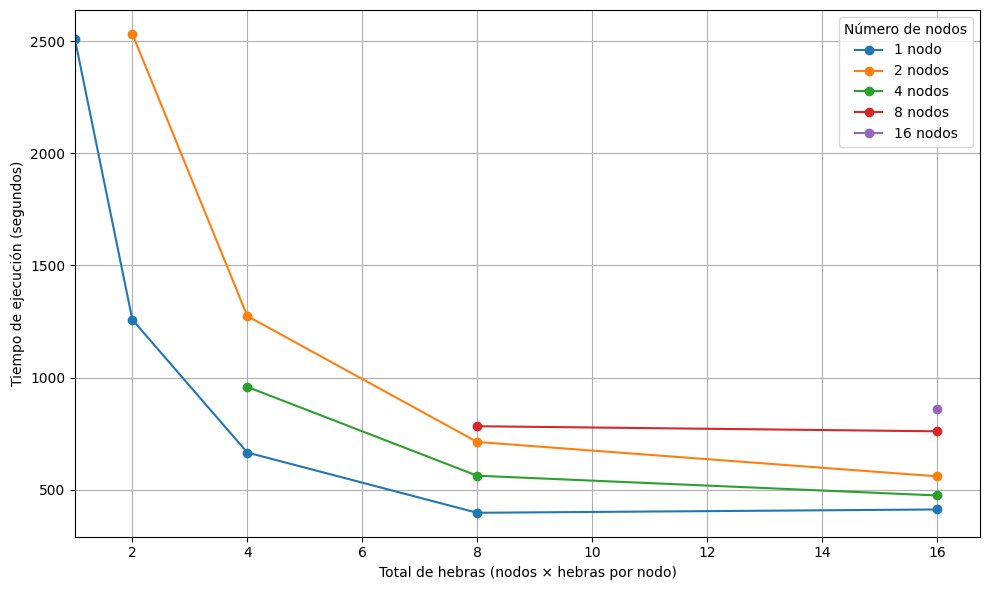

In [369]:
plt.figure(figsize=(10, 6))

for n_nodes in sorted(df_limit['nodes'].unique()):
    df_lim = df_limit[df_limit['nodes'] == n_nodes]
    plt.plot(
        df_lim['total_threads'],
        df_lim['time_seconds'],
        marker='o',
        linestyle='-',
        label=f'{n_nodes} nodo{"s" if n_nodes > 1 else ""}'
    )

plt.xlabel('Total de hebras (nodos × hebras por nodo)')
plt.ylabel('Tiempo de ejecución (segundos)')
plt.legend(title='Número de nodos')
plt.grid(True)
plt.xlim(left=1)
plt.tight_layout()
plt.show()

(1.0, 16.75)

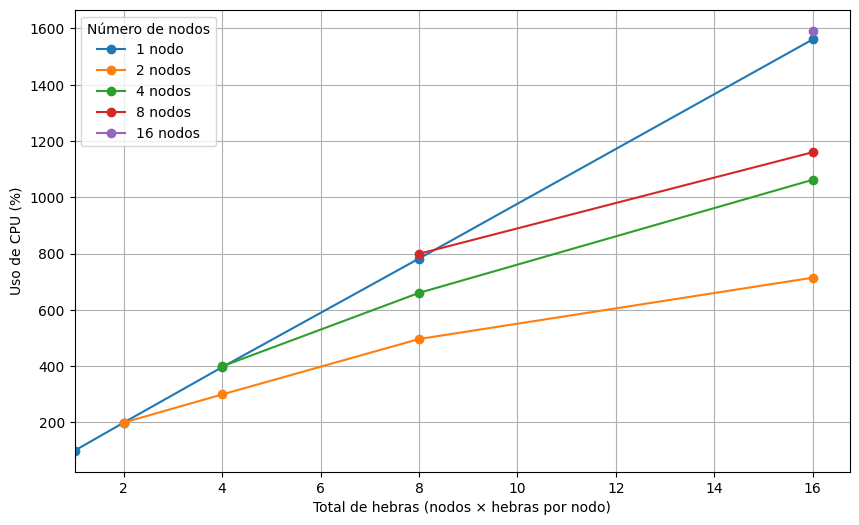

In [370]:
plt.figure(figsize=(10, 6))

for n_nodes in sorted(df_limit['nodes'].unique()):
    df_lim = df_limit[df_limit['nodes'] == n_nodes]
    plt.plot(
        df_lim['total_threads'],
        df_lim['cpu_percentage'],
        marker='o',
        linestyle='-',
        label=f'{n_nodes} nodo{"s" if n_nodes > 1 else ""}'
    )

plt.xlabel('Total de hebras (nodos × hebras por nodo)')
plt.ylabel('Uso de CPU (%)')
plt.legend(title='Número de nodos')
plt.grid(True)
plt.xlim(left=1)

In [371]:
# Ordenar por tiempo de ejecución ascendente para el caso con límite
from IPython.display import display, Markdown
import pandas as pd
sorted_df_lim = df_limit.sort_values('time_seconds')

# Crear lista para almacenar los mejores resultados
best_results_lim = []

for rank, (_, row) in enumerate(sorted_df_lim.iterrows(), 1):
    total_threads = row['nodes'] * row['threads']
    best_results_lim.append({
        "Nodos": row['nodes'],
        "Hebras por nodo": row['threads'],
        "Hebras totales": total_threads,
        "Tiempo (s)": f"{row['time_seconds']:.2f}",
        "Uso de CPU (%)": row['cpu_percentage']
    })

# Convertir a DataFrame y mostrar como tabla Markdown

tabla_lim = pd.DataFrame(best_results_lim)
display(Markdown(tabla_lim.to_markdown(index=False, floatfmt=".2f")))

|   Nodos |   Hebras por nodo |   Hebras totales |   Tiempo (s) |   Uso de CPU (%) |
|--------:|------------------:|-----------------:|-------------:|-----------------:|
|       1 |                 8 |                8 |       397.68 |              782 |
|       1 |                16 |               16 |       412.40 |             1561 |
|       4 |                 4 |               16 |       474.95 |             1062 |
|       2 |                 8 |               16 |       560.14 |              714 |
|       4 |                 2 |                8 |       562.90 |              660 |
|       1 |                 4 |                4 |       666.26 |              396 |
|       2 |                 4 |                8 |       713.26 |              496 |
|       8 |                 2 |               16 |       760.80 |             1160 |
|       8 |                 1 |                8 |       783.41 |              799 |
|      16 |                 1 |               16 |       860.27 |             1592 |
|       4 |                 1 |                4 |       958.67 |              399 |
|       1 |                 2 |                2 |      1258.22 |              199 |
|       2 |                 2 |                4 |      1274.65 |              299 |
|       1 |                 1 |                1 |      2508.78 |               99 |
|       2 |                 1 |                2 |      2531.66 |              199 |

### Sin límite de hebras


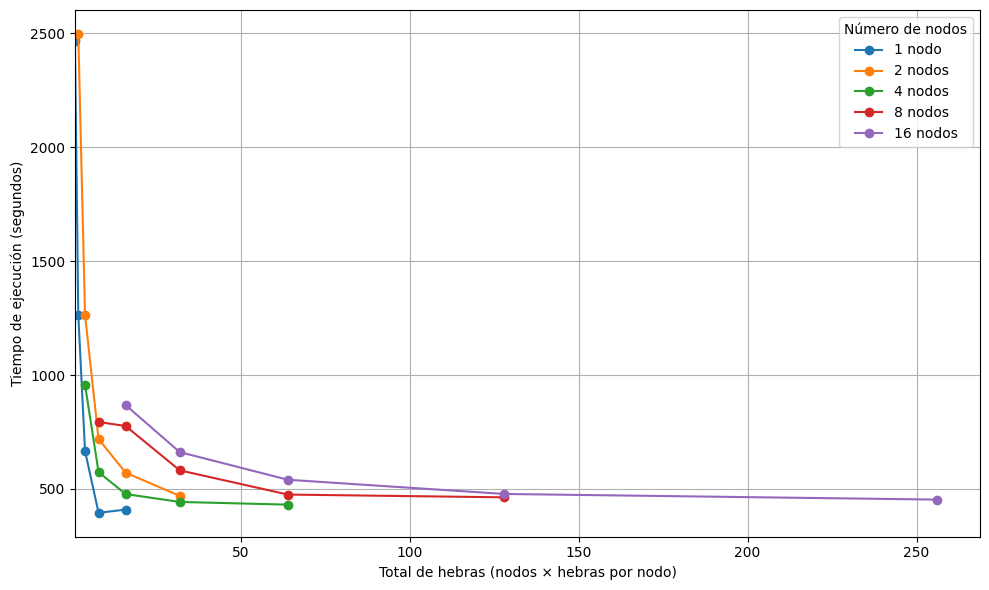

In [372]:
plt.figure(figsize=(10, 6))

for n_nodes in sorted(df_no_limit['nodes'].unique()):
    df_no = df_no_limit[df_no_limit['nodes'] == n_nodes]
    plt.plot(
        df_no['total_threads'],
        df_no['time_seconds'],
        marker='o',
        linestyle='-',
        label=f'{n_nodes} nodo{"s" if n_nodes > 1 else ""}'
    )

plt.xlabel('Total de hebras (nodos × hebras por nodo)')
plt.ylabel('Tiempo de ejecución (segundos)')
plt.legend(title='Número de nodos')
plt.grid(True)
plt.xlim(left=1)
plt.tight_layout()
plt.show()

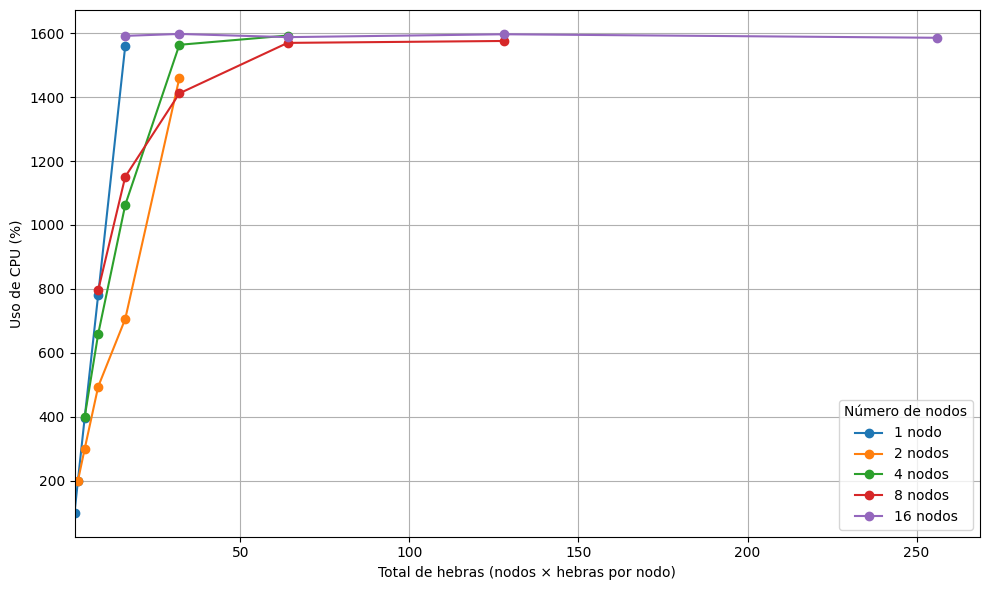

In [373]:
plt.figure(figsize=(10, 6))

for n_nodes in sorted(df_no_limit['nodes'].unique()):
    df_no = df_no_limit[df_no_limit['nodes'] == n_nodes]
    plt.plot(
        df_no['total_threads'],
        df_no['cpu_percentage'],
        marker='o',
        linestyle='-',
        label=f'{n_nodes} nodo{"s" if n_nodes > 1 else ""}'
    )

plt.xlabel('Total de hebras (nodos × hebras por nodo)')
plt.ylabel('Uso de CPU (%)')
plt.legend(title='Número de nodos')
plt.grid(True)
plt.xlim(left=1)
plt.tight_layout()
plt.show()

In [374]:
# Sort by execution time (ascending)
sorted_df = df_no_limit.sort_values('time_seconds')

# Create a list to store the best results
best_results = []

for rank, (_, row) in enumerate(sorted_df.iterrows(), 1):
    total_threads = row['nodes'] * row['threads']
    best_results.append({
        "Nodos": row['nodes'],
        "Hebras por nodo": row['threads'],
        "Hebras totales": total_threads,
        "Tiempo (s)": f"{row['time_seconds']:.2f}",
        "Uso de CPU (%)": row['cpu_percentage']
    })

tabla = pd.DataFrame(best_results)
display(Markdown(tabla.to_markdown(index=False, floatfmt=".2f")))

|   Nodos |   Hebras por nodo |   Hebras totales |   Tiempo (s) |   Uso de CPU (%) |
|--------:|------------------:|-----------------:|-------------:|-----------------:|
|       1 |                 8 |                8 |       395.63 |              782 |
|       1 |                16 |               16 |       409.51 |             1561 |
|       4 |                16 |               64 |       431.30 |             1593 |
|       4 |                 8 |               32 |       443.23 |             1564 |
|      16 |                16 |              256 |       453.48 |             1586 |
|       8 |                16 |              128 |       463.45 |             1576 |
|       2 |                16 |               32 |       469.88 |             1460 |
|       8 |                 8 |               64 |       475.59 |             1570 |
|       4 |                 4 |               16 |       477.90 |             1063 |
|      16 |                 8 |              128 |       478.23 |             1597 |
|      16 |                 4 |               64 |       540.54 |             1588 |
|       2 |                 8 |               16 |       571.65 |              706 |
|       4 |                 2 |                8 |       573.94 |              659 |
|       8 |                 4 |               32 |       581.91 |             1412 |
|      16 |                 2 |               32 |       662.10 |             1598 |
|       1 |                 4 |                4 |       666.51 |              396 |
|       2 |                 4 |                8 |       719.43 |              494 |
|       8 |                 2 |               16 |       776.44 |             1151 |
|       8 |                 1 |                8 |       794.09 |              796 |
|      16 |                 1 |               16 |       868.28 |             1592 |
|       4 |                 1 |                4 |       956.38 |              399 |
|       2 |                 2 |                4 |      1263.74 |              299 |
|       1 |                 2 |                2 |      1264.94 |              199 |
|       1 |                 1 |                1 |      2467.76 |               99 |
|       2 |                 1 |                2 |      2497.06 |              199 |

### Comparativa de ambos enfoques


In [375]:
# Sort by execution time (ascending)
sorted_df = df_no_limit.sort_values('time_seconds')

# Create a list to store the best results
best_results = []

for rank, (_, row) in enumerate(sorted_df.iterrows(), 1):
    total_threads = row['nodes'] * row['threads']
    best_results.append({
        "Nodos": row['nodes'],
        "Hebras por nodo": row['threads'],
        "Hebras totales": total_threads,
        "Tiempo (s)": f"{row['time_seconds']:.2f}",
        "Uso de CPU (%)": row['cpu_percentage']
    })

# Convert to DataFrame and show as markdown table
tabla = pd.DataFrame(best_results)
display(Markdown(tabla.to_markdown(index=False, floatfmt=".2f")))

|   Nodos |   Hebras por nodo |   Hebras totales |   Tiempo (s) |   Uso de CPU (%) |
|--------:|------------------:|-----------------:|-------------:|-----------------:|
|       1 |                 8 |                8 |       395.63 |              782 |
|       1 |                16 |               16 |       409.51 |             1561 |
|       4 |                16 |               64 |       431.30 |             1593 |
|       4 |                 8 |               32 |       443.23 |             1564 |
|      16 |                16 |              256 |       453.48 |             1586 |
|       8 |                16 |              128 |       463.45 |             1576 |
|       2 |                16 |               32 |       469.88 |             1460 |
|       8 |                 8 |               64 |       475.59 |             1570 |
|       4 |                 4 |               16 |       477.90 |             1063 |
|      16 |                 8 |              128 |       478.23 |             1597 |
|      16 |                 4 |               64 |       540.54 |             1588 |
|       2 |                 8 |               16 |       571.65 |              706 |
|       4 |                 2 |                8 |       573.94 |              659 |
|       8 |                 4 |               32 |       581.91 |             1412 |
|      16 |                 2 |               32 |       662.10 |             1598 |
|       1 |                 4 |                4 |       666.51 |              396 |
|       2 |                 4 |                8 |       719.43 |              494 |
|       8 |                 2 |               16 |       776.44 |             1151 |
|       8 |                 1 |                8 |       794.09 |              796 |
|      16 |                 1 |               16 |       868.28 |             1592 |
|       4 |                 1 |                4 |       956.38 |              399 |
|       2 |                 2 |                4 |      1263.74 |              299 |
|       1 |                 2 |                2 |      1264.94 |              199 |
|       1 |                 1 |                1 |      2467.76 |               99 |
|       2 |                 1 |                2 |      2497.06 |              199 |

A partir del análisis de la tabla, se pueden extraer las siguientes conclusiones técnicas:

- El mejor rendimiento se alcanza al emplear un menor número de nodos y un mayor número de hebras por nodo, siendo la configuración óptima la de 1 nodo y 8 hebras.
- Aunque el límite físico de hebras de la CPU es de 16, se observa que, entre los 10 mejores resultados, solo 3 respetan este límite. En los demás casos, incrementar el número de hebras más allá de la capacidad física de la CPU sigue proporcionando mejoras en el rendimiento. Este comportamiento, aunque inicialmente contraintuitivo, puede explicarse analizando el uso efectivo de la CPU.
- El porcentaje de uso de CPU refleja el grado de aprovechamiento de las hebras disponibles. Por ejemplo, con 1 hebra el uso máximo es 100%, con 2 hebras es 200%, y así sucesivamente, hasta un máximo teórico de 1600% (16 hebras × 100%). En configuraciones con un único nodo, el incremento en el número de hebras se traduce en un aumento proporcional del uso de CPU:

| Nodos | Hebras por nodo | Hebras totales | Tiempo (s) | Uso CPU (%) |
| ----- | --------------- | -------------- | ---------- | ----------- |
| 1     | 8               | 8              | 395.63     | 782         |
| 1     | 16              | 16             | 409.51     | 1561        |
| 1     | 4               | 4              | 666.51     | 396         |
| 1     | 2               | 2              | 1264.94    | 199         |
| 1     | 1               | 1              | 2467.76    | 99          |

- En contraste, cuando el número total de hebras se distribuye entre varios nodos (incluso si no se supera el límite físico de la CPU), el rendimiento no mejora de la misma manera. Esto se debe a la sobrecarga asociada a la gestión de múltiples nodos, que puede contrarrestar los beneficios de disponer de más hebras. En estos casos, el uso de CPU no alcanza los valores esperados, resultando en un rendimiento inferior respecto a configuraciones mononodo equivalentes:

| Nodos | Hebras por nodo | Hebras totales | Tiempo (s) | Uso CPU (%) |
| ----- | --------------- | -------------- | ---------- | ----------- |
| 4     | 4               | 16             | 477.90     | 1063        |
| 2     | 8               | 16             | 571.65     | 706         |
| 4     | 2               | 8              | 573.94     | 659         |
| 2     | 4               | 8              | 719.43     | 494         |
| 8     | 2               | 16             | 776.44     | 1151        |
| 8     | 1               | 8              | 794.09     | 796         |
| 16    | 1               | 16             | 868.28     | 1592        |
| 4     | 1               | 4              | 956.38     | 399         |
| 2     | 2               | 4              | 1263.74    | 299         |
| 2     | 1               | 2              | 2497.06    | 199         |

- Por tanto, para configuraciones multinodo, es necesario incrementar el número de hebras más allá de la capacidad física de la CPU para acercarse al uso máximo teórico (1600%), lo que explica por qué se obtienen mejores resultados bajo estas condiciones.


Si se analiza el rendimiento manteniendo constante el número total de hebras, se observa que las configuraciones con un único nodo presentan sistemáticamente los mejores tiempos de ejecución. Esto indica que, para un mismo grado de paralelismo, la distribución de hebras en un solo nodo minimiza la sobrecarga de comunicación y sincronización asociada al entorno multinodo.

### 16 hebras

| Nodes | Threads per node | Total threads | Time (s) | CPU usage (%) |
| ----- | ---------------- | ------------- | -------- | ------------- |
| 1     | 16               | 16            | 409.51   | 1561          |
| 4     | 4                | 16            | 477.90   | 1063          |
| 2     | 8                | 16            | 571.65   | 706           |
| 8     | 2                | 16            | 776.44   | 1151          |
| 16    | 1                | 16            | 868.28   | 1592          |

### 8 hebras

| Nodes | Threads per node | Total threads | Time (s) | CPU usage (%) |
| ----- | ---------------- | ------------- | -------- | ------------- |
| 1     | 8                | 8             | 395.63   | 782           |
| 4     | 2                | 8             | 573.94   | 659           |
| 2     | 4                | 8             | 719.43   | 494           |
| 8     | 1                | 8             | 794.09   | 796           |

### 4 hebras

| Nodes | Threads per node | Total threads | Time (s) | CPU usage (%) |
| ----- | ---------------- | ------------- | -------- | ------------- |
| 1     | 4                | 4             | 666.51   | 396           |
| 4     | 1                | 4             | 956.38   | 399           |
| 2     | 2                | 4             | 1263.74  | 299           |

### 2 hebras

| Nodes | Threads per node | Total threads | Time (s) | CPU usage (%) |
| ----- | ---------------- | ------------- | -------- | ------------- |
| 1     | 2                | 2             | 1264.94  | 199           |
| 2     | 1                | 2             | 2497.06  | 199           |

### 1 hebra

| Nodes | Threads per node | Total threads | Time (s) | CPU usage (%) |
| ----- | ---------------- | ------------- | -------- | ------------- |
| 1     | 1                | 1             | 2467.76  | 99            |

En general, se aprecia que, para un mismo número de hebras, el rendimiento mejora al reducir el número de nodos, lo que confirma el impacto negativo de la sobrecarga multinodo. Una excepción a esta tendencia se observa en el caso de 2 y 4 nodos con 4 hebras, donde la configuración de 4 nodos supera en rendimiento a la de 2 nodos, invirtiendo el orden esperado.


## Estudio del rendimiento al utilizar la misma GPU en todos los nodos


In [376]:
# Load the CSV files
df_ubuntu_native_gpu_limit = pd.read_csv('../results/experiments/ubuntu_native_gpu_limit.csv')
df_ubuntu_native_gpu_no_limit = pd.read_csv('../results/experiments/ubuntu_native_gpu_no-limit.csv')

# Convert time column to seconds using the provided helper function
df_ubuntu_native_gpu_no_limit['time_seconds'] = df_ubuntu_native_gpu_no_limit['time'].apply(time_to_seconds)
df_ubuntu_native_gpu_limit['time_seconds'] = df_ubuntu_native_gpu_limit['time'].apply(time_to_seconds)

### GPU limitada a un nodo


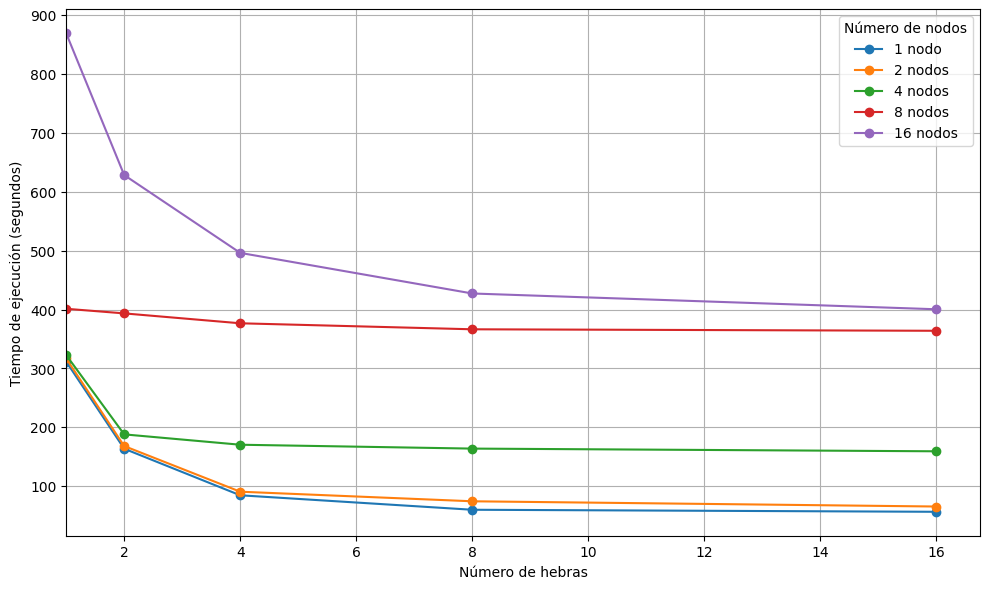

In [377]:
plt.figure(figsize=(10, 6))

for n_nodes in sorted(df_ubuntu_native_gpu_limit['nodes'].unique()):
    df_lim = df_ubuntu_native_gpu_limit[df_ubuntu_native_gpu_limit['nodes'] == n_nodes]
    plt.plot(
        df_lim['threads'],
        df_lim['time_seconds'],
        marker='o',
        linestyle='-',
        label=f'{n_nodes} nodo{"s" if n_nodes > 1 else ""}'
    )

plt.xlabel('Número de hebras')
plt.ylabel('Tiempo de ejecución (segundos)')
plt.legend(title='Número de nodos')
plt.grid(True)
plt.xlim(left=1)
plt.tight_layout()
plt.show()

### GPU sin límite de nodos


(1.0, 16.75)

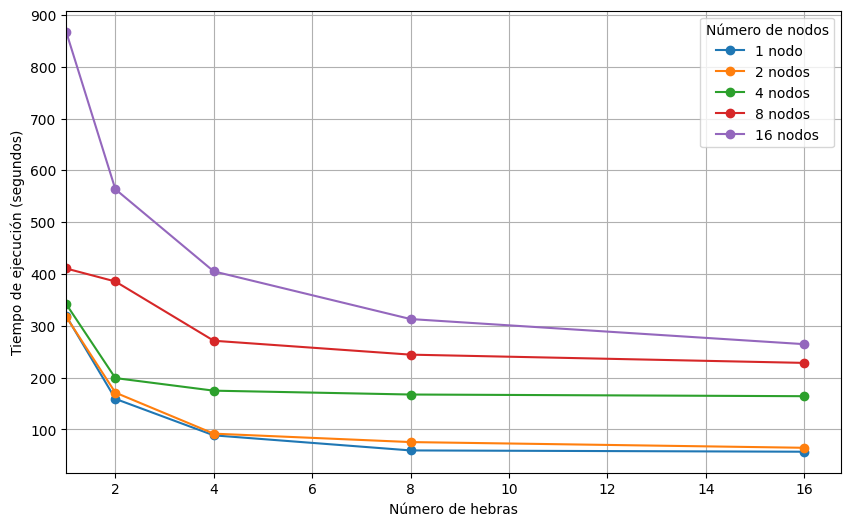

In [378]:
plt.figure(figsize=(10, 6))

for n_nodes in sorted(df_ubuntu_native_gpu_no_limit['nodes'].unique()):
    df_no = df_ubuntu_native_gpu_no_limit[df_ubuntu_native_gpu_no_limit['nodes'] == n_nodes]
    plt.plot(
        df_no['threads'],
        df_no['time_seconds'],
        marker='o',
        linestyle='-',
        label=f'{n_nodes} nodo{"s" if n_nodes > 1 else ""}'
    )

plt.xlabel('Número de hebras')
plt.ylabel('Tiempo de ejecución (segundos)')
plt.legend(title='Número de nodos')
plt.grid(True)
plt.xlim(left=1)

### Comparativa de ambos enfoques


In [379]:

# Unir los dataframes por 'nodes' y 'threads'
tabla = pd.merge(
    df_ubuntu_native_gpu_limit[['nodes', 'threads', 'time_seconds']],
    df_ubuntu_native_gpu_no_limit[['nodes', 'threads', 'time_seconds']],
    on=['nodes', 'threads'],
    how='outer',
    suffixes=('_limit', '_no_limit')
)

# Renombrar columnas para mayor claridad
tabla = tabla.rename(columns={
    'nodes': 'Nodos',
    'threads': 'Hebras',
    'time_seconds_limit': 'Tiempo GPU limitado (s)',
    'time_seconds_no_limit': 'Tiempo GPU sin límite (s)'
})

# Calcular la variación porcentual
tabla['Variación (%)'] = 100 * (tabla['Tiempo GPU sin límite (s)'] - tabla['Tiempo GPU limitado (s)']) / tabla['Tiempo GPU limitado (s)']

# Ordenar para mejor visualización
tabla = tabla.sort_values(['Nodos', 'Hebras'])

# Mostrar como tabla markdown
display(Markdown(tabla.to_markdown(index=False, floatfmt=".2f")))

|   Nodos |   Hebras |   Tiempo GPU limitado (s) |   Tiempo GPU sin límite (s) |   Variación (%) |
|--------:|---------:|--------------------------:|----------------------------:|----------------:|
|    1.00 |     1.00 |                    311.68 |                      319.01 |            2.35 |
|    1.00 |     2.00 |                    163.59 |                      158.94 |           -2.84 |
|    1.00 |     4.00 |                     84.49 |                       88.52 |            4.77 |
|    1.00 |     8.00 |                     59.91 |                       59.41 |           -0.83 |
|    1.00 |    16.00 |                     56.45 |                       56.91 |            0.81 |
|    2.00 |     1.00 |                    316.92 |                      317.35 |            0.14 |
|    2.00 |     2.00 |                    168.14 |                      170.99 |            1.70 |
|    2.00 |     4.00 |                     90.58 |                       91.78 |            1.32 |
|    2.00 |     8.00 |                     74.30 |                       75.53 |            1.66 |
|    2.00 |    16.00 |                     65.40 |                       64.51 |           -1.36 |
|    4.00 |     1.00 |                    322.77 |                      341.95 |            5.94 |
|    4.00 |     2.00 |                    187.98 |                      199.04 |            5.88 |
|    4.00 |     4.00 |                    170.38 |                      174.74 |            2.56 |
|    4.00 |     8.00 |                    163.80 |                      167.31 |            2.14 |
|    4.00 |    16.00 |                    159.22 |                      164.07 |            3.05 |
|    8.00 |     1.00 |                    401.33 |                      410.54 |            2.29 |
|    8.00 |     2.00 |                    393.50 |                      385.47 |           -2.04 |
|    8.00 |     4.00 |                    376.68 |                      271.10 |          -28.03 |
|    8.00 |     8.00 |                    366.47 |                      244.26 |          -33.35 |
|    8.00 |    16.00 |                    363.94 |                      228.34 |          -37.26 |
|   16.00 |     1.00 |                    869.40 |                      867.50 |           -0.22 |
|   16.00 |     2.00 |                    628.49 |                      563.51 |          -10.34 |
|   16.00 |     4.00 |                    496.28 |                      404.98 |          -18.40 |
|   16.00 |     8.00 |                    427.30 |                      312.94 |          -26.76 |
|   16.00 |    16.00 |                    400.48 |                      264.49 |          -33.96 |

**Análisis**

Para configuraciones de 1, 2 y 4 nodos, las diferencias de rendimiento entre las ejecuciones "con límite" y "sin límite" son reducidas (Δ% entre -3% y +6%), sin observarse una tendencia sistemática a favor de una u otra opción. En estos casos, la variabilidad puede atribuirse a fluctuaciones experimentales y no a una limitación real impuesta por el entorno.

Sin embargo, al incrementar el número de nodos a 8 y 16, la versión "sin límite" muestra una ventaja clara y consistente, alcanzando diferencias de hasta -37% en el caso de 16 hebras y 16 nodos. Esto evidencia que la imposición de un límite restringe el aprovechamiento de los recursos disponibles, especialmente en escenarios de alta concurrencia y escalabilidad.

En consecuencia, para estudios de escalabilidad multinodo, es recomendable emplear la versión "sin límite", ya que permite obtener tiempos de ejecución menores y refleja de manera más precisa el potencial máximo del sistema al aumentar el número de nodos y hebras.


## Conclusiones

A partir de los experimentos realizados, se extraen las siguientes conclusiones técnicas relevantes para futuros estudios:

- **Número de subpoblaciones:** Se selecciona 8 subpoblaciones como valor óptimo, ya que maximiza el rendimiento observado. Utilizar menos subpoblaciones implica un aprovechamiento subóptimo de los recursos de cómputo, mientras que aumentar el número no aporta mejoras significativas, evidenciando que el sistema alcanza su máximo rendimiento con 8 subpoblaciones.

- **Número de hebras:** El incremento del número de hebras no garantiza una mejora continua del rendimiento, especialmente cuando se mantiene el número de hebras, pero estas se reparten en más nodos. El mejor resultado se obtiene con una configuración de 1 nodo y 8 hebras, coincidiendo con el número de núcleos físicos del sistema.

  - **Diferencia porcentual de rendimiento:** La diferencia de tiempo de ejecución entre la configuración óptima (1 nodo, 8 hebras) y la de 1 nodo y 16 hebras es:

  $$
  \text{Diferencia (\%)} = \frac{409.51 - 395.63}{395.63} \times 100 = 3.51\%
  $$

  Por tanto, ejecutar con 1 nodo y 16 hebras resulta aproximadamente un **3.5% más lento** que con 1 nodo y 8 hebras.

  - **Criterio para los estudios comparativos:** Dado que el objetivo principal es comparar la conservación del rendimiento entre la ejecución nativa y la ejecución en contenedores, y no la búsqueda del óptimo absoluto, se realizarán los experimentos mononodo hasta 16 hebras.

  - **Escalabilidad multinodo:** Para el análisis multinodo, se mantendrá el criterio de comparar el rendimiento observado en la ejecución nativa, explorando configuraciones de hasta 16 nodos y 16 hebras, asegurando así una evaluación completa de la escalabilidad y la equivalencia de rendimiento entre ambos entornos.

- **Uso de la GPU:** Cuando se hagan pruebas de rendimiento en entornos que utilizan GPU, esta estará presente en todos los nodos, por lo que todos podrán hacer uso de ella. Esto es debido a que se ha demostrado que en presencia de GPU, el rendimiento es mejor cuando está a disposición de todos los nodos.


# Escalabilidad Mononodo


## Ejecución en Ubuntu en Nativo


### CPU


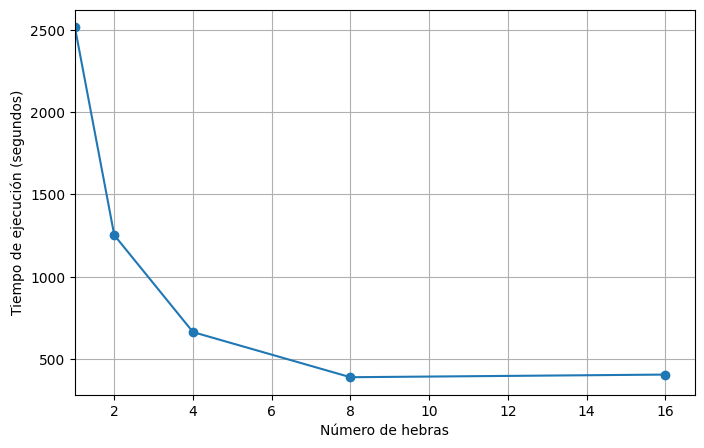

In [380]:
# Load the CSV data
df_ubuntu_native = pd.read_csv('../results/thread-sweep/ubuntu_native.csv')

# Filter for single-node executions (nodes == 1)
df_ubuntu_native_single_node = df_ubuntu_native[df_ubuntu_native['nodes'] == 1].copy()

# Convert the 'time' column to seconds
df_ubuntu_native_single_node['time_seconds'] = df_ubuntu_native_single_node['time'].apply(time_to_seconds)

# Plot execution time vs number of threads for single-node runs
plt.figure(figsize=(8, 5))
plt.plot(df_ubuntu_native_single_node['threads'], df_ubuntu_native_single_node['time_seconds'], marker='o')
plt.xlabel('Número de hebras')
plt.ylabel('Tiempo de ejecución (segundos)')
# plt.title('Mononodo Ubuntu Nativo: CPU - Tiempo de ejecución')
plt.grid(True)
plt.xlim(left=1)
plt.show()

In [381]:
# Get the base time (1 thread)
base_time = df_ubuntu_native_single_node[df_ubuntu_native_single_node['threads'] == 1]['time_seconds'].values[0]

# Calculate percentage variation
df_ubuntu_native_single_node['Δ%'] = 100 * (df_ubuntu_native_single_node['time_seconds'] - base_time) / base_time

# Create and show the table
table = df_ubuntu_native_single_node[['threads', 'time_seconds', 'Δ%']].rename(
    columns={'threads': 'Hebras', 'time_seconds': 'Tiempo (s)', 'Δ%': 'Δ% vs 1 hebra'}
)
display(Markdown(table.to_markdown(index=False, floatfmt=".2f")))

|   Hebras |   Tiempo (s) |   Δ% vs 1 hebra |
|---------:|-------------:|----------------:|
|     1.00 |      2515.21 |            0.00 |
|     2.00 |      1253.18 |          -50.18 |
|     4.00 |       664.69 |          -73.57 |
|     8.00 |       390.72 |          -84.47 |
|    16.00 |       406.76 |          -83.83 |

**Análisis:**

- El tiempo de ejecución disminuye drásticamente al aumentar el número de hebras, especialmente de $1$ a $8$ hebras.
- Con $2$ hebras, el tiempo se reduce a la mitad ($-50.18\%$), y con $4$ hebras, a casi un cuarto ($-73.57\%$).
- El mayor beneficio se observa al pasar de $4$ a $8$ hebras, alcanzando una reducción del $-84.47\%$ respecto a una hebra.
- Al aumentar a $16$ hebras, el tiempo es ligeramente superior al de $8$ hebras, lo que sugiere saturación o sobrecarga.
- El óptimo se alcanza con $8$ hebras, coincidiendo con el número de núcleos físicos del sistema.

Esto sugiere un buen escalado del rendimiento con el número de hebras en un entorno mononodo de ejecución nativa en Ubuntu en presencia de CPU únicamente.


Text(0, 0.5, 'Porcentaje de CPU (%)')

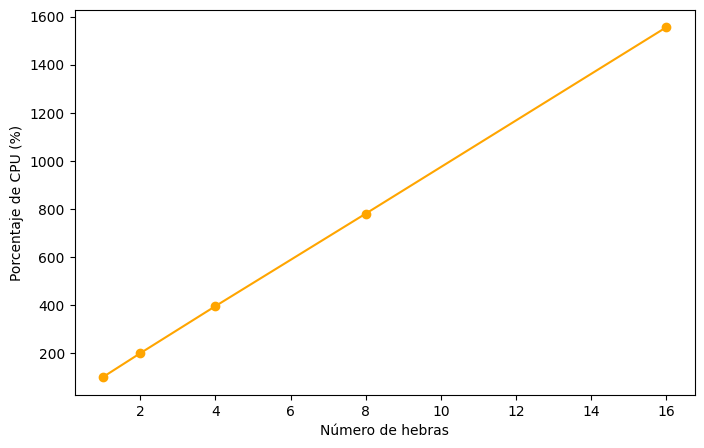

In [382]:
# Plot CPU usage vs number of threads for single-node runs
plt.figure(figsize=(8, 5))
plt.plot(df_ubuntu_native_single_node['threads'], df_ubuntu_native_single_node['cpu_percentage'], marker='o', color='orange')
plt.xlabel('Número de hebras')
plt.ylabel('Porcentaje de CPU (%)')

In [383]:
# Show CPU usage table by number of threads, including theoretical max CPU usage and efficiency
cpu_table = df_ubuntu_native_single_node[['threads', 'cpu_percentage']].rename(
    columns={'threads': 'Hebras', 'cpu_percentage': 'Porcentaje de CPU (%)'}
)
# Add theoretical max CPU usage column
cpu_table['Max posible CPU (%)'] = cpu_table['Hebras'] * 100
# Add efficiency column: CPU usage (%) / Max CPU usage (%) * 100
cpu_table['Eficiencia CPU (%)'] = 100 * cpu_table['Porcentaje de CPU (%)'] / cpu_table['Max posible CPU (%)']
display(Markdown(cpu_table.to_markdown(index=False, floatfmt=".2f")))

|   Hebras |   Porcentaje de CPU (%) |   Max posible CPU (%) |   Eficiencia CPU (%) |
|---------:|------------------------:|----------------------:|---------------------:|
|     1.00 |                   99.00 |                100.00 |                99.00 |
|     2.00 |                  199.00 |                200.00 |                99.50 |
|     4.00 |                  395.00 |                400.00 |                98.75 |
|     8.00 |                  780.00 |                800.00 |                97.50 |
|    16.00 |                 1556.00 |               1600.00 |                97.25 |

**Análisis:**

- El uso de CPU crece casi linealmente con el número de hebras, lo que indica un buen escalado del paralelismo.
- La eficiencia de CPU se mantiene muy alta en todos los casos (por encima del $97\%$), lo que significa que casi todo el potencial de la CPU se está aprovechando.
- A medida que aumenta el número de hebras, la eficiencia baja ligeramente (de un máximo de $99\%$ a un mínimo de $97.25\%$), lo que es esperable debido a la sobrecarga de gestión de más hilos y posibles contenciones.
- El sistema escala de forma eficiente hasta $16$ hebras, con una pérdida de eficiencia muy pequeña.

Esto indica que el entorno nativo en Ubuntu gestiona eficazmente el paralelismo y aprovecha bien los recursos de la CPU.


### CPU + GPU


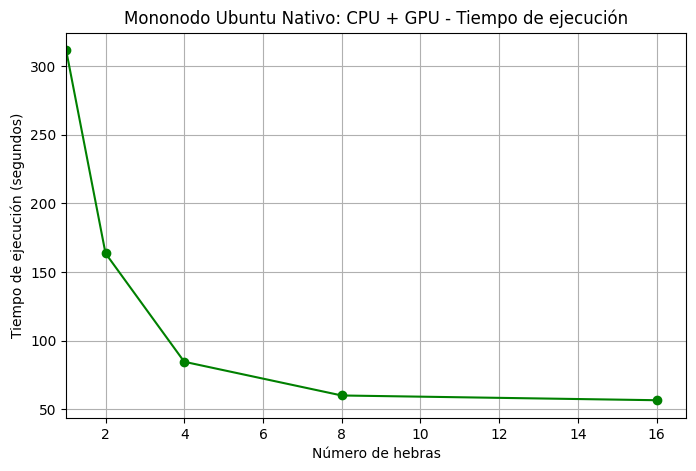

In [384]:
# Load the CSV data for GPU runs
df_ubuntu_native_gpu = pd.read_csv('../results/thread-sweep/ubuntu_native_gpu.csv')

# Filter for single-node executions (nodes == 1)
df_ubuntu_native_gpu_single_node = df_ubuntu_native_gpu[df_ubuntu_native_gpu['nodes'] == 1].copy()

# Convert the 'time' column to seconds using the provided function
df_ubuntu_native_gpu_single_node['time_seconds'] = df_ubuntu_native_gpu_single_node['time'].apply(time_to_seconds)

# Plot execution time vs number of threads for single-node GPU runs
plt.figure(figsize=(8, 5))
plt.plot(df_ubuntu_native_gpu_single_node['threads'], df_ubuntu_native_gpu_single_node['time_seconds'], marker='o', color='green')
plt.xlabel('Número de hebras')
plt.ylabel('Tiempo de ejecución (segundos)')
plt.title('Mononodo Ubuntu Nativo: CPU + GPU - Tiempo de ejecución')
plt.grid(True)
plt.xlim(left=1)
plt.show()

In [385]:
# Get the base time (1 thread)
base_time_gpu = df_ubuntu_native_gpu_single_node[df_ubuntu_native_gpu_single_node['threads'] == 1]['time_seconds'].values[0]

# Calculate percentage variation
df_ubuntu_native_gpu_single_node['Δ%'] = 100 * (df_ubuntu_native_gpu_single_node['time_seconds'] - base_time_gpu) / base_time_gpu

# Create and display the table
table_gpu = df_ubuntu_native_gpu_single_node[['threads', 'time_seconds', 'Δ%']].rename(
    columns={'threads': 'Hebras', 'time_seconds': 'Tiempo (s)', 'Δ%': 'Δ% vs 1 hebra'}
)
display(Markdown(table_gpu.to_markdown(index=False, floatfmt=".2f")))


|   Hebras |   Tiempo (s) |   Δ% vs 1 hebra |
|---------:|-------------:|----------------:|
|     1.00 |       311.68 |            0.00 |
|     2.00 |       163.59 |          -47.51 |
|     4.00 |        84.49 |          -72.89 |
|     8.00 |        59.91 |          -80.78 |
|    16.00 |        56.45 |          -81.89 |

**Análisis:**

- El tiempo de ejecución disminuye significativamente al aumentar el número de hebras, especialmente de $1$ a $4$ hebras (reducción del $72.89\%$).
- A partir de $8$ hebras, la mejora es marginal (de $59.91s$ a $56.45s$ al pasar de $8$ a $16$ hebras, solo un $1.11\%$ adicional), por lo que se alcanza un punto óptimo de rendimiento con $8$ hebras.
- La mayor ganancia se observa al pasar de $1$ a $2$ hebras ($-47.51\%$) y de $2$ a $4$ hebras ($-25.38\%$ adicional). Más allá de $8$ hebras, el sistema parece alcanzar un límite de paralelización eficiente.
- La combinación CPU + GPU permite una aceleración notable, pero la eficiencia se estabiliza a partir de cierto número de hebras.


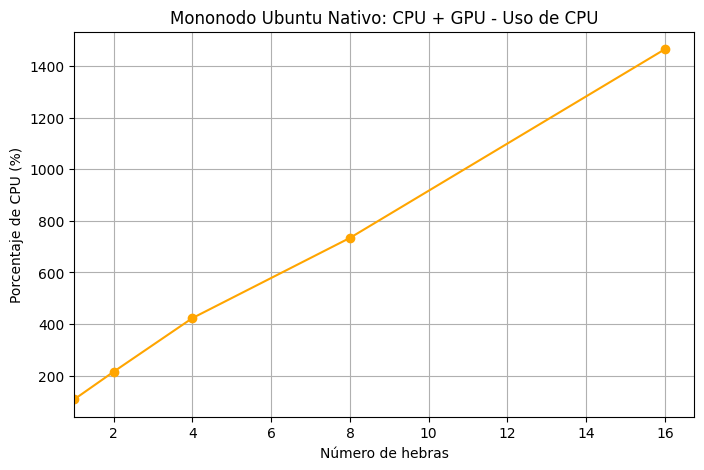

In [386]:
# Plot CPU usage vs number of threads for single-node GPU runs
plt.figure(figsize=(8, 5))
plt.plot(df_ubuntu_native_gpu_single_node['threads'], df_ubuntu_native_gpu_single_node['cpu_percentage'], marker='o', color='orange')
plt.xlabel('Número de hebras')
plt.ylabel('Porcentaje de CPU (%)')
plt.title('Mononodo Ubuntu Nativo: CPU + GPU - Uso de CPU')
plt.grid(True)
plt.xlim(left=1)
plt.show()

In [387]:
# Show CPU usage table by number of threads for GPU runs, including theoretical max CPU usage and efficiency
cpu_table_gpu = df_ubuntu_native_gpu_single_node[['threads', 'cpu_percentage']].rename(
    columns={'threads': 'Hebras', 'cpu_percentage': 'Porcentaje de CPU (%)'}
)
cpu_table_gpu['Max posible CPU (%)'] = cpu_table_gpu['Hebras'] * 100
cpu_table_gpu['Eficiencia CPU (%)'] = 100 * cpu_table_gpu['Porcentaje de CPU (%)'] / cpu_table_gpu['Max posible CPU (%)']
display(Markdown(cpu_table_gpu.to_markdown(index=False, floatfmt=".2f")))

|   Hebras |   Porcentaje de CPU (%) |   Max posible CPU (%) |   Eficiencia CPU (%) |
|---------:|------------------------:|----------------------:|---------------------:|
|     1.00 |                  108.00 |                100.00 |               108.00 |
|     2.00 |                  215.00 |                200.00 |               107.50 |
|     4.00 |                  423.00 |                400.00 |               105.75 |
|     8.00 |                  734.00 |                800.00 |                91.75 |
|    16.00 |                 1466.00 |               1600.00 |                91.62 |

**Análisis:**

- Para los casos de $1$, $2$ y $4$ hebras, la eficiencia de CPU es superior al $100\%$, lo que puede sugerir un error en las mediciones, ya que la eficiencia no debería superar el $100\%$.
- A partir de $8$ hebras, la eficiencia muestra valores más realistas, oscilando entre $91.75\%$ y $91.62\%$, lo que indica un buen aprovechamiento de los recursos disponibles.


### Comparativa de Rendimiento


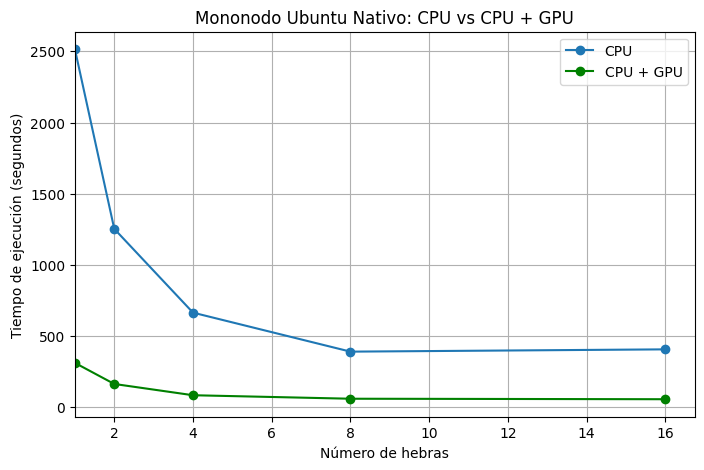

In [388]:
# Comparative plot in a single figure: CPU vs CPU+GPU (1 node)
plt.figure(figsize=(8, 5))
plt.plot(df_ubuntu_native_single_node['threads'], df_ubuntu_native_single_node['time_seconds'], marker='o', label='CPU')
plt.plot(df_ubuntu_native_gpu_single_node['threads'], df_ubuntu_native_gpu_single_node['time_seconds'], marker='o', color='green', label='CPU + GPU')
plt.xlabel('Número de hebras')
plt.ylabel('Tiempo de ejecución (segundos)')
plt.title('Mononodo Ubuntu Nativo: CPU vs CPU + GPU')
plt.legend()
plt.grid(True)
plt.xlim(left=1)
plt.show()

In [389]:
# Comparative table in Markdown: Threads, CPU Time, CPU+GPU Time, Percentage Variation

# Merge by number of threads
comparison = pd.merge(
    df_ubuntu_native_single_node[['threads', 'time_seconds']],
    df_ubuntu_native_gpu_single_node[['threads', 'time_seconds']],
    on='threads',
    suffixes=('_CPU', '_GPU')
)

# Calculate percentage variation between CPU+GPU and CPU
comparison['Variation %'] = 100 * (comparison['time_seconds_GPU'] - comparison['time_seconds_CPU']) / comparison['time_seconds_CPU']

# Rename columns for the table
comparison_table = comparison.rename(columns={
    'threads': 'Hebras',
    'time_seconds_CPU': 'Tiempo CPU (s)',
    'time_seconds_GPU': 'Tiempo CPU+GPU (s)',
    'Variation %': 'Variación %'
})

# Display comparative table in Markdown
display(Markdown(comparison_table[['Hebras', 'Tiempo CPU (s)', 'Tiempo CPU+GPU (s)', 'Variación %']].to_markdown(index=False, floatfmt=".2f")))

|   Hebras |   Tiempo CPU (s) |   Tiempo CPU+GPU (s) |   Variación % |
|---------:|-----------------:|---------------------:|--------------:|
|     1.00 |          2515.21 |               311.68 |        -87.61 |
|     2.00 |          1253.18 |               163.59 |        -86.95 |
|     4.00 |           664.69 |                84.49 |        -87.29 |
|     8.00 |           390.72 |                59.91 |        -84.67 |
|    16.00 |           406.76 |                56.45 |        -86.12 |

**Análisis:**

- El uso de GPU reduce el tiempo de ejecución entre un $84\%$ y un $88\%$ respecto a solo CPU, en todos los casos.
- La mejora relativa se mantiene estable al aumentar el número de hebras, lo que indica que la GPU aporta un beneficio constante independientemente del paralelismo en CPU.
- En CPU, el tiempo deja de mejorar al pasar de $8$ a $16$ hebras (incluso empeora), mientras que en CPU+GPU la mejora es marginal pero consistente.
- La incorporación de GPU es altamente beneficiosa, acelerando el procesamiento en torno al $85\%$ en todos los escenarios.


## Ejecución en Ubuntu en Contenedores


### CPU


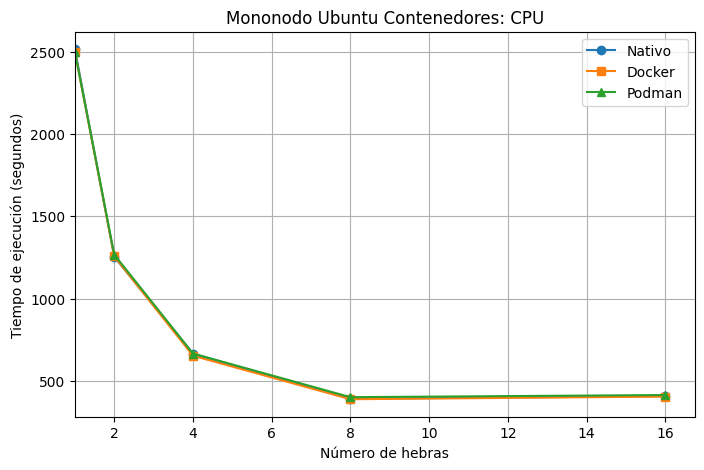

In [390]:
# Load the CSV data
df_ubuntu_docker = pd.read_csv('../results/thread-sweep/ubuntu_docker.csv')
df_ubuntu_podman = pd.read_csv('../results/thread-sweep/ubuntu_podman.csv')

# Filter for single-node executions (nodes == 1)
df_ubuntu_docker_single_node = df_ubuntu_docker[df_ubuntu_docker['nodes'] == 1].copy()
df_ubuntu_podman_single_node = df_ubuntu_podman[df_ubuntu_podman['nodes'] == 1].copy()

# Convert the 'time' column to seconds using the provided function
df_ubuntu_docker_single_node['time_seconds'] = df_ubuntu_docker_single_node['time'].apply(time_to_seconds)
df_ubuntu_podman_single_node['time_seconds'] = df_ubuntu_podman_single_node['time'].apply(time_to_seconds)

# Plot execution time vs number of threads for all environments
plt.figure(figsize=(8, 5))
plt.plot(df_ubuntu_native_single_node['threads'], df_ubuntu_native_single_node['time_seconds'], marker='o', label='Nativo')
plt.plot(df_ubuntu_docker_single_node['threads'], df_ubuntu_docker_single_node['time_seconds'], marker='s', label='Docker')
plt.plot(df_ubuntu_podman_single_node['threads'], df_ubuntu_podman_single_node['time_seconds'], marker='^', label='Podman')
plt.xlabel('Número de hebras')
plt.ylabel('Tiempo de ejecución (segundos)')
plt.title('Mononodo Ubuntu Contenedores: CPU')
plt.legend()
plt.grid(True)
plt.xlim(left=1)
plt.show()

In [391]:
# Calculate percentage variation
table = pd.DataFrame({
    'Hebras': df_ubuntu_native_single_node['threads'],
    'Nativo (s)': df_ubuntu_native_single_node['time_seconds'].values,
    'Docker (s)': df_ubuntu_docker_single_node['time_seconds'].values,
    'Docker Δ%': 100 * (df_ubuntu_docker_single_node['time_seconds'].values - df_ubuntu_native_single_node['time_seconds'].values) / df_ubuntu_native_single_node['time_seconds'].values,
    'Podman (s)': df_ubuntu_podman_single_node['time_seconds'].values,
    'Podman Δ%': 100 * (df_ubuntu_podman_single_node['time_seconds'].values - df_ubuntu_native_single_node['time_seconds'].values) / df_ubuntu_native_single_node['time_seconds'].values
})

# Show as markdown
display(Markdown(table.to_markdown(index=False, floatfmt=".2f")))

|   Hebras |   Nativo (s) |   Docker (s) |   Docker Δ% |   Podman (s) |   Podman Δ% |
|---------:|-------------:|-------------:|------------:|-------------:|------------:|
|     1.00 |      2515.21 |      2499.09 |       -0.64 |      2499.16 |       -0.64 |
|     2.00 |      1253.18 |      1255.95 |        0.22 |      1266.51 |        1.06 |
|     4.00 |       664.69 |       652.33 |       -1.86 |       665.38 |        0.10 |
|     8.00 |       390.72 |       388.04 |       -0.69 |       400.51 |        2.51 |
|    16.00 |       406.76 |       404.09 |       -0.66 |       413.53 |        1.66 |

**Análisis:**

- El rendimiento de Docker y Podman es prácticamente idéntico al nativo en todos los casos, con diferencias menores al $2.51\%$.
- Para $1$, $4$, $8$ y $16$ hebras, Docker es incluso ligeramente más rápido que la ejecución nativa.
- Podman muestra un comportamiento muy similar, aunque para $8$ y $16$ hebras es marginalmente más lento que nativo, pero la diferencia sigue siendo muy pequeña.
- Las diferencias de tiempo son tan pequeñas que pueden atribuirse a la variabilidad normal de ejecución y no a una penalización real por el uso de contenedores.


### CPU + GPU


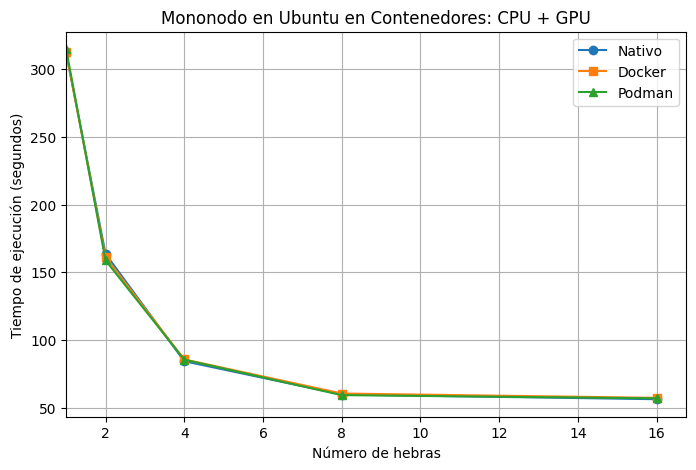

In [392]:
# Load the CSV data
df_ubuntu_docker_gpu = pd.read_csv('../results/thread-sweep/ubuntu_docker_gpu.csv')
df_ubuntu_podman_gpu = pd.read_csv('../results/thread-sweep/ubuntu_podman_gpu.csv')
# Filtrar ejecuciones mononodo (nodes == 1)
df_ubuntu_docker_gpu_single_node = df_ubuntu_docker_gpu[df_ubuntu_docker_gpu['nodes'] == 1].copy()
df_ubuntu_podman_gpu_single_node = df_ubuntu_podman_gpu[df_ubuntu_podman_gpu['nodes'] == 1].copy()

# Convertir la columna 'time' a segundos usando la función auxiliar
df_ubuntu_docker_gpu_single_node['time_seconds'] = df_ubuntu_docker_gpu_single_node['time'].apply(time_to_seconds)
df_ubuntu_podman_gpu_single_node['time_seconds'] = df_ubuntu_podman_gpu_single_node['time'].apply(time_to_seconds)

# Graficar tiempo de ejecución vs número de hebras para Docker y Podman (GPU, 1 nodo)
plt.figure(figsize=(8, 5))
plt.plot(df_ubuntu_native_gpu_single_node['threads'], df_ubuntu_native_gpu_single_node['time_seconds'], marker='o', label='Nativo')
plt.plot(df_ubuntu_docker_gpu_single_node['threads'], df_ubuntu_docker_gpu_single_node['time_seconds'], marker='s', label='Docker')
plt.plot(df_ubuntu_podman_gpu_single_node['threads'], df_ubuntu_podman_gpu_single_node['time_seconds'], marker='^', label='Podman')
plt.xlabel('Número de hebras')
plt.ylabel('Tiempo de ejecución (segundos)')
plt.title('Mononodo en Ubuntu en Contenedores: CPU + GPU')
plt.legend()
plt.grid(True)
plt.xlim(left=1)
plt.show()

In [393]:
# Comparativa CPU+GPU: Nativo vs Docker vs Podman (1 nodo)

table_gpu = pd.DataFrame({
    'Hebras': df_ubuntu_native_gpu_single_node['threads'],
    'Nativo (s)': df_ubuntu_native_gpu_single_node['time_seconds'].values,
    'Docker (s)': df_ubuntu_docker_gpu_single_node['time_seconds'].values,
    'Docker Δ%': 100 * (df_ubuntu_docker_gpu_single_node['time_seconds'].values - df_ubuntu_native_gpu_single_node['time_seconds'].values) / df_ubuntu_native_gpu_single_node['time_seconds'].values,
    'Podman (s)': df_ubuntu_podman_gpu_single_node['time_seconds'].values,
    'Podman Δ%': 100 * (df_ubuntu_podman_gpu_single_node['time_seconds'].values - df_ubuntu_native_gpu_single_node['time_seconds'].values) / df_ubuntu_native_gpu_single_node['time_seconds'].values
})

display(Markdown(table_gpu.to_markdown(index=False, floatfmt=".2f")))

|   Hebras |   Nativo (s) |   Docker (s) |   Docker Δ% |   Podman (s) |   Podman Δ% |
|---------:|-------------:|-------------:|------------:|-------------:|------------:|
|     1.00 |       311.68 |       312.18 |        0.16 |       314.51 |        0.91 |
|     2.00 |       163.59 |       161.10 |       -1.52 |       158.84 |       -2.90 |
|     4.00 |        84.49 |        85.78 |        1.53 |        85.62 |        1.34 |
|     8.00 |        59.91 |        60.65 |        1.24 |        59.47 |       -0.73 |
|    16.00 |        56.45 |        57.45 |        1.77 |        57.12 |        1.19 |

**Análisis**

- Las diferencias de rendimiento entre la ejecución nativa y en contenedores (Docker y Podman) son menores al $3\%$ en todos los casos, lo que indica que el impacto de la contenerización es prácticamente despreciable.

- Docker y Podman muestran comportamientos muy similares, aunque Podman presenta un rendimiento ligeramente mejor en $2$ y $8$ hebras, llegando hasta un $-2.9\%$ respecto a la ejecución nativa.

- El patrón de mejora al aumentar el número de hebras se mantiene en todos los entornos, lo que demuestra que la escalabilidad no se ve afectada por el uso de contenedores.

- El overhead introducido por Docker o Podman es tan bajo que, en algunos casos, los tiempos son incluso marginalmente mejores que en nativo, probablemente debido a la variabilidad de las mediciones.

- Ejecutar cargas intensivas en CPU+GPU dentro de contenedores es totalmente viable y permite aprovechar la portabilidad y flexibilidad de estas tecnologías sin sacrificar eficiencia.


### Comparativa de Rendimiento


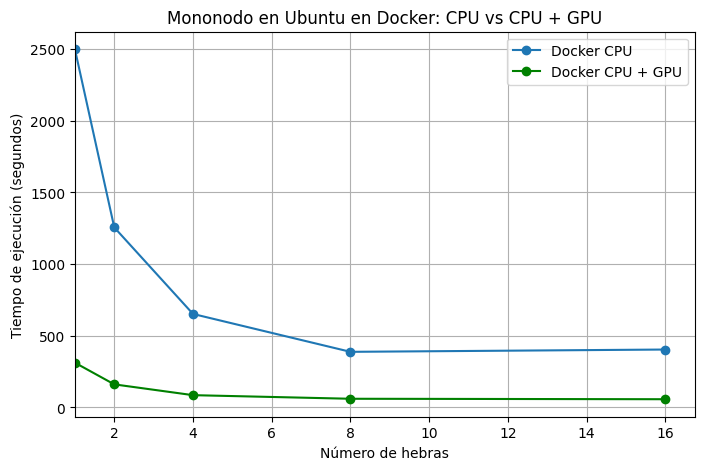

In [394]:
# Comparative plot in a single figure: Docker sólo CPU vs Docker CPU+GPU (1 nodo)
plt.figure(figsize=(8, 5))
plt.plot(df_ubuntu_docker_single_node['threads'], df_ubuntu_docker_single_node['time_seconds'], marker='o', label='Docker CPU')
plt.plot(df_ubuntu_docker_gpu_single_node['threads'], df_ubuntu_docker_gpu_single_node['time_seconds'], marker='o', color='green', label='Docker CPU + GPU')
plt.xlabel('Número de hebras')
plt.ylabel('Tiempo de ejecución (segundos)')
plt.title('Mononodo en Ubuntu en Docker: CPU vs CPU + GPU')
plt.legend()
plt.grid(True)
plt.xlim(left=1)
plt.show()

In [395]:
# Comparativa Docker: CPU vs CPU+GPU (1 nodo) en tabla
comparison_docker = pd.DataFrame({
    'Hebras': df_ubuntu_docker_single_node['threads'],
    'Docker CPU (s)': df_ubuntu_docker_single_node['time_seconds'].values,
    'Docker CPU+GPU (s)': df_ubuntu_docker_gpu_single_node['time_seconds'].values,
    'Variación %': 100 * (df_ubuntu_docker_gpu_single_node['time_seconds'].values - df_ubuntu_docker_single_node['time_seconds'].values) / df_ubuntu_docker_single_node['time_seconds'].values
})

display(Markdown(comparison_docker.to_markdown(index=False, floatfmt=".2f")))


|   Hebras |   Docker CPU (s) |   Docker CPU+GPU (s) |   Variación % |
|---------:|-----------------:|---------------------:|--------------:|
|     1.00 |          2499.09 |               312.18 |        -87.51 |
|     2.00 |          1255.95 |               161.10 |        -87.17 |
|     4.00 |           652.33 |                85.78 |        -86.85 |
|     8.00 |           388.04 |                60.65 |        -84.37 |
|    16.00 |           404.09 |                57.45 |        -85.78 |

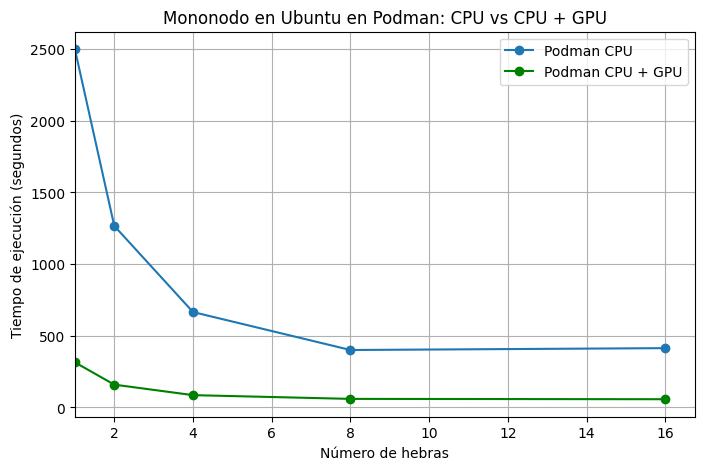

In [396]:
# Comparative plot in a single figure: Podman sólo CPU vs Podman CPU+GPU (1 nodo)
plt.figure(figsize=(8, 5))
plt.plot(df_ubuntu_podman_single_node['threads'], df_ubuntu_podman_single_node['time_seconds'], marker='o', label='Podman CPU')
plt.plot(df_ubuntu_podman_gpu_single_node['threads'], df_ubuntu_podman_gpu_single_node['time_seconds'], marker='o', color='green', label='Podman CPU + GPU')
plt.xlabel('Número de hebras')
plt.ylabel('Tiempo de ejecución (segundos)')
plt.title('Mononodo en Ubuntu en Podman: CPU vs CPU + GPU')
plt.legend()
plt.grid(True)
plt.xlim(left=1)
plt.show()

In [397]:
comparison_podman = pd.DataFrame({
    'Hebras': df_ubuntu_podman_single_node['threads'],
    'Podman CPU (s)': df_ubuntu_podman_single_node['time_seconds'].values,
    'Podman CPU+GPU (s)': df_ubuntu_podman_gpu_single_node['time_seconds'].values,
    'Variación %': 100 * (df_ubuntu_podman_gpu_single_node['time_seconds'].values - df_ubuntu_podman_single_node['time_seconds'].values) / df_ubuntu_podman_single_node['time_seconds'].values
})

display(Markdown(comparison_podman.to_markdown(index=False, floatfmt=".2f")))

|   Hebras |   Podman CPU (s) |   Podman CPU+GPU (s) |   Variación % |
|---------:|-----------------:|---------------------:|--------------:|
|     1.00 |          2499.16 |               314.51 |        -87.42 |
|     2.00 |          1266.51 |               158.84 |        -87.46 |
|     4.00 |           665.38 |                85.62 |        -87.13 |
|     8.00 |           400.51 |                59.47 |        -85.15 |
|    16.00 |           413.53 |                57.12 |        -86.19 |

## Ejecución en Contenedores en Windows


### CPU


### CPU + GPU


### Comparativa de Rendimiento


## Ejecución en Contenedores en Mac


### CPU


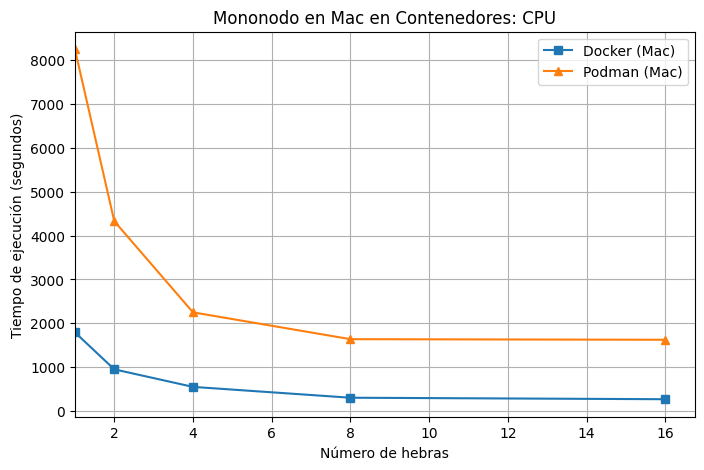

In [398]:
# Load data
df_mac_docker = pd.read_csv('../results/thread-sweep/mac_docker.csv')
df_mac_podman = pd.read_csv('../results/thread-sweep/mac_podman.csv')

# Filter for single-node executions (nodes == 1)
df_mac_docker_single_node = df_mac_docker[df_mac_docker['nodes'] == 1].copy()
df_mac_podman_single_node = df_mac_podman[df_mac_podman['nodes'] == 1].copy()

# Convert time column to seconds
df_mac_docker_single_node['time_seconds'] = df_mac_docker_single_node['time'].apply(time_to_seconds)
df_mac_podman_single_node['time_seconds'] = df_mac_podman_single_node['time'].apply(time_to_seconds)

# Plot: Execution time vs number of threads (1 node, Mac)
plt.figure(figsize=(8, 5))
plt.plot(df_mac_docker_single_node['threads'], df_mac_docker_single_node['time_seconds'], marker='s', label='Docker (Mac)')
plt.plot(df_mac_podman_single_node['threads'], df_mac_podman_single_node['time_seconds'], marker='^', label='Podman (Mac)')
plt.xlabel('Número de hebras')
plt.ylabel('Tiempo de ejecución (segundos)')
plt.title('Mononodo en Mac en Contenedores: CPU')
plt.legend()
plt.grid(True)
plt.xlim(left=1)
plt.show()

In [399]:
# Calculate percentage variation for Mac Docker vs Mac Podman
table_mac = pd.DataFrame({
    'Threads': df_mac_docker[df_mac_docker['nodes'] == 1]['threads'],
    'Docker (Mac) (s)': df_mac_docker[df_mac_docker['nodes'] == 1]['time'].apply(time_to_seconds).values,
    'Podman (Mac) (s)': df_mac_podman[df_mac_podman['nodes'] == 1]['time'].apply(time_to_seconds).values,
    'Podman Δ%': 100 * (
        df_mac_podman[df_mac_podman['nodes'] == 1]['time'].apply(time_to_seconds).values -
        df_mac_docker[df_mac_docker['nodes'] == 1]['time'].apply(time_to_seconds).values
    ) / df_mac_docker[df_mac_docker['nodes'] == 1]['time'].apply(time_to_seconds).values
})

display(Markdown(table_mac.to_markdown(index=False, floatfmt=".2f")))

|   Threads |   Docker (Mac) (s) |   Podman (Mac) (s) |   Podman Δ% |
|----------:|-------------------:|-------------------:|------------:|
|      1.00 |            1794.98 |            8247.00 |      359.45 |
|      2.00 |             951.56 |            4328.00 |      354.83 |
|      4.00 |             551.41 |            2250.20 |      308.08 |
|      8.00 |             304.35 |            1638.79 |      438.46 |
|     16.00 |             270.25 |            1625.19 |      501.37 |

**Conclusiones:**

- **Docker** ofrece tiempos de ejecución mucho menores que **Podman** en todas las configuraciones.
- La penalización de Podman respecto a Docker es extremadamente alta, superando el 300% en todos los casos y llegando hasta un 500% con 16 hebras.
- El rendimiento de Podman en Mac es muy inferior, lo que lo hace inviable para cargas de trabajo exigentes o experimentos de escalabilidad.

**Recomendación:**  
En Mac, se debe utilizar Docker en lugar de Podman para obtener un rendimiento aceptable. Podman no es adecuado para este entorno según estos resultados.


# Escalabilidad Multinodo


## Ejecución Nativa


### CPU


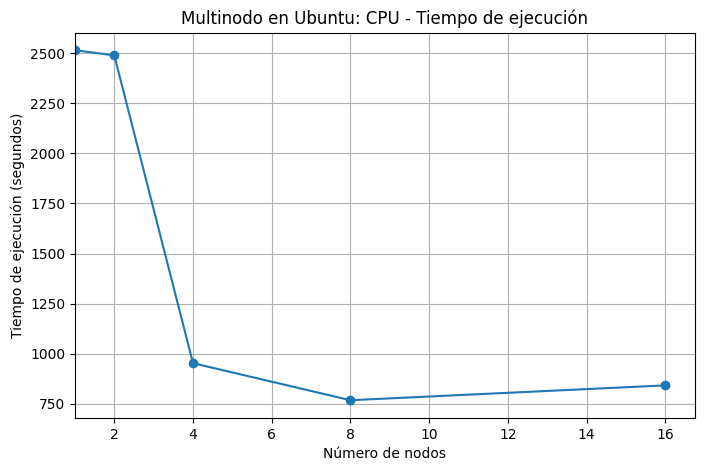

In [400]:
# Filter for runs with a single thread per node
df_ubuntu_native_multi_node = df_ubuntu_native[df_ubuntu_native['threads'] == 1].copy()

# Convert the 'time' column to seconds using the provided function
df_ubuntu_native_multi_node['time_seconds'] = df_ubuntu_native_multi_node['time'].apply(time_to_seconds)

# Plot execution time vs number of nodes for runs with 1 thread per node
plt.figure(figsize=(8, 5))
plt.plot(df_ubuntu_native_multi_node['nodes'], df_ubuntu_native_multi_node['time_seconds'], marker='o')
plt.xlabel('Número de nodos')
plt.ylabel('Tiempo de ejecución (segundos)')
plt.title('Multinodo en Ubuntu: CPU - Tiempo de ejecución')
plt.grid(True)
plt.xlim(left=1)
plt.show()

In [401]:
# Get the reference time for 1 node
ref_time = df_ubuntu_native_multi_node[df_ubuntu_native_multi_node['nodes'] == 1]['time_seconds'].values[0]

# Calculate percentage variation vs 1 node
df_ubuntu_native_multi_node['Δ% vs 1 node'] = 100 * (df_ubuntu_native_multi_node['time_seconds'] - ref_time) / ref_time

# Show the data as a markdown table
table = df_ubuntu_native_multi_node[['nodes', 'time_seconds', 'Δ% vs 1 node']].rename(
    columns={'nodes': 'Nodos', 'time_seconds': 'Tiempo de ejecución (s)', 'Δ% vs 1 node': 'Δ% vs 1 nodo'}
)
display(Markdown(table.to_markdown(index=False, floatfmt=".2f")))

|   Nodos |   Tiempo de ejecución (s) |   Δ% vs 1 nodo |
|--------:|--------------------------:|---------------:|
|    1.00 |                   2515.21 |           0.00 |
|    2.00 |                   2489.49 |          -1.02 |
|    4.00 |                    952.85 |         -62.12 |
|    8.00 |                    767.87 |         -69.47 |
|   16.00 |                    841.96 |         -66.53 |

**Análisis:**

- **Escalabilidad inicial muy limitada:** Al pasar de 1 a 2 nodos, el tiempo apenas mejora (-1.02%), lo que indica que el problema no se paraleliza eficientemente con solo 2 nodos.
- **Mejora significativa con 4 nodos:** Con 4 nodos, el tiempo de ejecución cae un 62%, mostrando que a partir de este punto la paralelización es efectiva.
- **Óptimo relativo en 8 nodos:** El mejor tiempo se obtiene con 8 nodos (-69.47%), lo que implica que la eficiencia de paralelización es máxima en este punto para este experimento.
- **Degradación al aumentar a 16 nodos:** Al usar 16 nodos, el tiempo aumenta respecto a 8 nodos y la mejora respecto a 1 nodo es menor (-66.53%). Esto sugiere que la sobrecarga de comunicación y sincronización empieza a superar los beneficios de añadir más nodos.

**Conclusión:**  
La escalabilidad es muy baja con pocos nodos, mejora mucho al llegar a 4 y 8 nodos, pero añadir más nodos no aporta mejoras adicionales e incluso puede empeorar el rendimiento por overhead. El punto óptimo para este caso concreto es 8 nodos.


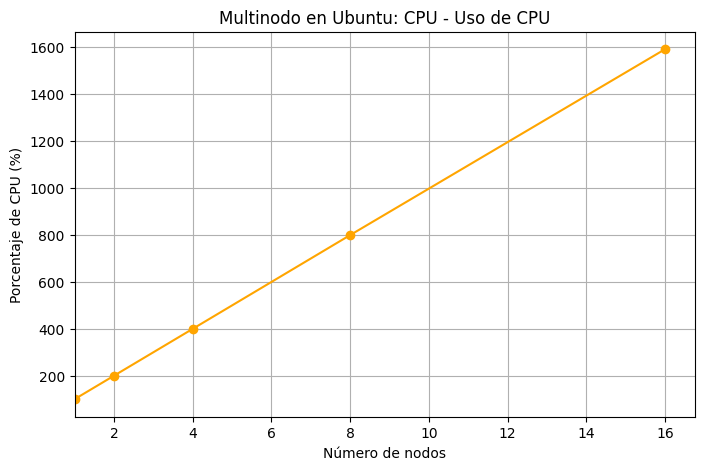

In [402]:
# Plot: CPU usage vs number of nodes (labels in Spanish)
plt.figure(figsize=(8, 5))
plt.plot(df_ubuntu_native_multi_node['nodes'], df_ubuntu_native_multi_node['cpu_percentage'], marker='o', color='orange')
plt.xlabel('Número de nodos')
plt.ylabel('Porcentaje de CPU (%)')
plt.title('Multinodo en Ubuntu: CPU - Uso de CPU')
plt.grid(True)
plt.xlim(left=1)
plt.show()

In [403]:
# Summary table: CPU usage vs number of nodes (labels in Spanish)
cpu_table = df_ubuntu_native_multi_node[['nodes', 'cpu_percentage']].rename(
    columns={'nodes': 'Nodos', 'cpu_percentage': 'Porcentaje de CPU (%)'}
)
# Add theoretical max CPU usage column (nodos x 100)
cpu_table['Max uso CPU (%)'] = cpu_table['Nodos'] * 100
# Add efficiency column: CPU usage (%) / Max CPU usage (%) * 100
cpu_table['Eficiencia CPU (%)'] = 100 * cpu_table['Porcentaje de CPU (%)'] / cpu_table['Max uso CPU (%)']
display(Markdown(cpu_table.to_markdown(index=False, floatfmt=".2f")))

|   Nodos |   Porcentaje de CPU (%) |   Max uso CPU (%) |   Eficiencia CPU (%) |
|--------:|------------------------:|------------------:|---------------------:|
|    1.00 |                   99.00 |            100.00 |                99.00 |
|    2.00 |                  199.00 |            200.00 |                99.50 |
|    4.00 |                  399.00 |            400.00 |                99.75 |
|    8.00 |                  799.00 |            800.00 |                99.88 |
|   16.00 |                 1592.00 |           1600.00 |                99.50 |

**Análisis**

- El uso de CPU aumenta de manera prácticamente lineal con el número de nodos, lo que evidencia un escalado eficiente en la utilización de recursos computacionales.
- La eficiencia de CPU se mantiene elevada en todos los escenarios (≥99%), indicando que el sistema aprovecha casi la totalidad de la capacidad de cómputo disponible, incluso al incrementar el número de nodos.
- El valor máximo de eficiencia se observa con 8 nodos (99.88%), aunque la diferencia respecto al resto de configuraciones es marginal.
- No se detecta una disminución significativa de la eficiencia al escalar hasta 16 nodos, lo que sugiere que la sobrecarga asociada a la gestión y comunicación entre nodos es mínima o está adecuadamente controlada en este entorno experimental.
- Estos resultados reflejan un comportamiento de escalabilidad sobresaliente en términos de uso de CPU, lo que es especialmente relevante para aplicaciones de computación paralela.

**Conclusiones**  
El sistema mantiene una eficiencia de CPU prácticamente óptima al aumentar el número de nodos, lo que confirma la idoneidad de la arquitectura y la implementación paralela para este caso de uso.


### CPU + GPU


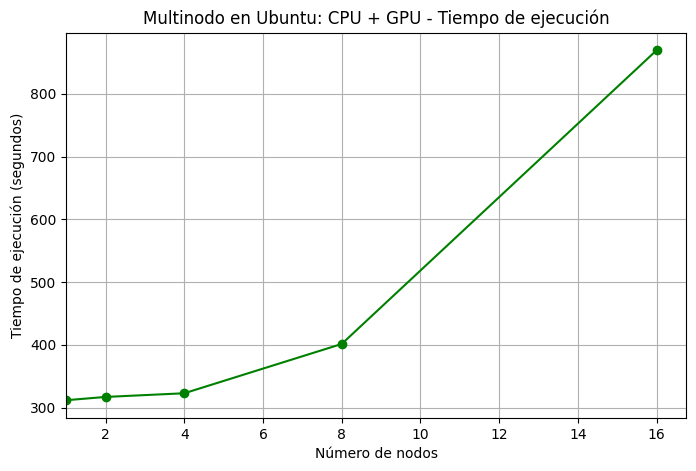

In [404]:
# Filtrar ejecuciones multinodo con 1 hebra por nodo (CPU+GPU)
df_ubuntu_native_gpu_multi_node = df_ubuntu_native_gpu[df_ubuntu_native_gpu['threads'] == 1].copy()

# Convertir la columna 'time' a segundos
df_ubuntu_native_gpu_multi_node['time_seconds'] = df_ubuntu_native_gpu_multi_node['time'].apply(time_to_seconds)

# Graficar tiempo de ejecución vs número de nodos (1 hebra por nodo, CPU+GPU)
plt.figure(figsize=(8, 5))
plt.plot(df_ubuntu_native_gpu_multi_node['nodes'], df_ubuntu_native_gpu_multi_node['time_seconds'], marker='o', color='green')
plt.xlabel('Número de nodos')
plt.ylabel('Tiempo de ejecución (segundos)')
plt.title('Multinodo en Ubuntu: CPU + GPU - Tiempo de ejecución')
plt.grid(True)
plt.xlim(left=1)
plt.show()

## Ejecución en Contenedores en Nativo


### CPU


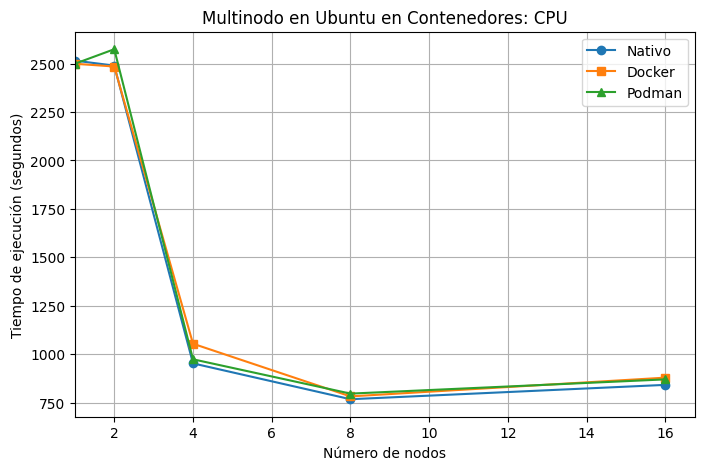

In [405]:
# Filtrar ejecuciones con 1 hebra por nodo para Docker y Podman
df_ubuntu_docker_multi_node = df_ubuntu_docker[df_ubuntu_docker['threads'] == 1].copy()
df_ubuntu_podman_multi_node = df_ubuntu_podman[df_ubuntu_podman['threads'] == 1].copy()

# Convertir la columna 'time' a segundos
df_ubuntu_docker_multi_node['time_seconds'] = df_ubuntu_docker_multi_node['time'].apply(time_to_seconds)
df_ubuntu_podman_multi_node['time_seconds'] = df_ubuntu_podman_multi_node['time'].apply(time_to_seconds)

# Graficar tiempo de ejecución vs número de nodos para Nativo, Docker y Podman (1 hebra por nodo)
plt.figure(figsize=(8, 5))
plt.plot(df_ubuntu_native_multi_node['nodes'], df_ubuntu_native_multi_node['time_seconds'], marker='o', label='Nativo')
plt.plot(df_ubuntu_docker_multi_node['nodes'], df_ubuntu_docker_multi_node['time_seconds'], marker='s', label='Docker')
plt.plot(df_ubuntu_podman_multi_node['nodes'], df_ubuntu_podman_multi_node['time_seconds'], marker='^', label='Podman')
plt.xlabel('Número de nodos')
plt.ylabel('Tiempo de ejecución (segundos)')
plt.title('Multinodo en Ubuntu en Contenedores: CPU')
plt.legend()
plt.grid(True)
plt.xlim(left=1)
plt.show()

### CPU + GPU


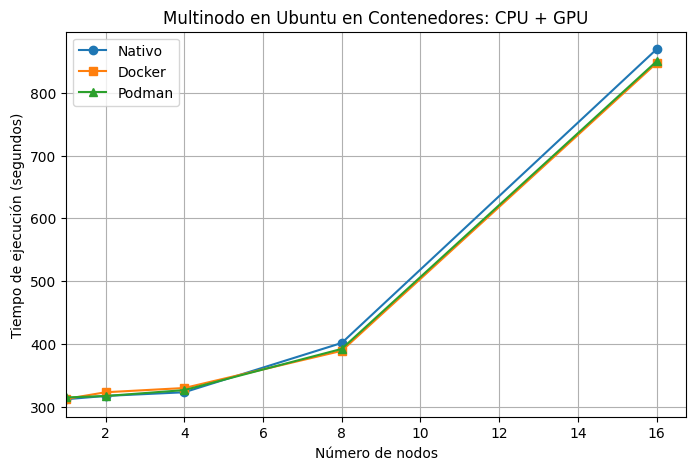

In [406]:
# Filtrar ejecuciones con 1 hebra por nodo para Docker y Podman (GPU)
df_ubuntu_docker_gpu_multi_node = df_ubuntu_docker_gpu[df_ubuntu_docker_gpu['threads'] == 1].copy()
df_ubuntu_podman_gpu_multi_node = df_ubuntu_podman_gpu[df_ubuntu_podman_gpu['threads'] == 1].copy()

# Convertir la columna 'time' a segundos
df_ubuntu_docker_gpu_multi_node['time_seconds'] = df_ubuntu_docker_gpu_multi_node['time'].apply(time_to_seconds)
df_ubuntu_podman_gpu_multi_node['time_seconds'] = df_ubuntu_podman_gpu_multi_node['time'].apply(time_to_seconds)

# Graficar tiempo de ejecución vs número de nodos para Nativo, Docker y Podman (1 hebra por nodo, GPU)
plt.figure(figsize=(8, 5))
plt.plot(df_ubuntu_native_gpu_multi_node['nodes'], df_ubuntu_native_gpu_multi_node['time_seconds'], marker='o', label='Nativo')
plt.plot(df_ubuntu_docker_gpu_multi_node['nodes'], df_ubuntu_docker_gpu_multi_node['time_seconds'], marker='s', label='Docker')
plt.plot(df_ubuntu_podman_gpu_multi_node['nodes'], df_ubuntu_podman_gpu_multi_node['time_seconds'], marker='^', label='Podman')
plt.xlabel('Número de nodos')
plt.ylabel('Tiempo de ejecución (segundos)')
plt.title('Multinodo en Ubuntu en Contenedores: CPU + GPU')
plt.legend()
plt.grid(True)
plt.xlim(left=1)
plt.show()

In [407]:
# Tabla comparativa: Tiempo de ejecución y variación % respecto a Nativo (1 hebra por nodo, GPU)

tabla_gpu = pd.DataFrame({
    'Nodos': df_ubuntu_native_gpu_multi_node['nodes'],
    'Nativo (s)': df_ubuntu_native_gpu_multi_node['time_seconds'].values,
    'Docker (s)': df_ubuntu_docker_gpu_multi_node['time_seconds'].values,
    'Docker Δ%': 100 * (df_ubuntu_docker_gpu_multi_node['time_seconds'].values - df_ubuntu_native_gpu_multi_node['time_seconds'].values) / df_ubuntu_native_gpu_multi_node['time_seconds'].values,
    'Podman (s)': df_ubuntu_podman_gpu_multi_node['time_seconds'].values,
    'Podman Δ%': 100 * (df_ubuntu_podman_gpu_multi_node['time_seconds'].values - df_ubuntu_native_gpu_multi_node['time_seconds'].values) / df_ubuntu_native_gpu_multi_node['time_seconds'].values
})

display(Markdown(tabla_gpu.to_markdown(index=False, floatfmt=".2f")))

|   Nodos |   Nativo (s) |   Docker (s) |   Docker Δ% |   Podman (s) |   Podman Δ% |
|--------:|-------------:|-------------:|------------:|-------------:|------------:|
|    1.00 |       311.68 |       312.18 |        0.16 |       314.51 |        0.91 |
|    2.00 |       316.92 |       322.77 |        1.85 |       316.80 |       -0.04 |
|    4.00 |       322.77 |       329.54 |        2.10 |       326.20 |        1.06 |
|    8.00 |       401.33 |       388.78 |       -3.13 |       391.86 |       -2.36 |
|   16.00 |       869.40 |       847.37 |       -2.53 |       850.18 |       -2.21 |

**Análisis**

- **1 y 2 nodos:** Docker y Podman presentan tiempos de ejecución prácticamente idénticos o incluso ligeramente mejores que el entorno nativo (Δ% negativo).
- **A partir de 4 nodos:** Docker muestra un incremento notable en el tiempo de ejecución respecto al nativo (hasta un **10.64%** más lento con 4 nodos), mientras que Podman también es más lento, pero con una penalización menor (máximo **3.77%**).
- **8 y 16 nodos:** Docker y Podman siguen siendo algo más lentos que el nativo, pero la diferencia se reduce respecto al caso de 4 nodos.

**Comportamiento de Docker**

- Docker es el entorno que más penalización muestra al aumentar el número de nodos, especialmente en la transición de 2 a 4 nodos.
- Para 1 y 2 nodos, Docker incluso mejora levemente el tiempo respecto al nativo, lo que puede deberse a variabilidad experimental o a una mejor gestión puntual de recursos.

**Comportamiento de Podman**

- Podman mantiene una penalización moderada y más estable que Docker a partir de 4 nodos.
- En ningún caso supera el **4%** de penalización respecto al nativo.

**Tendencia general**

- El mayor impacto negativo de los contenedores se observa al escalar a 4 nodos, especialmente en Docker.
- Para configuraciones de muchos nodos (8 y 16), la penalización de Docker y Podman es similar y relativamente baja (entre **1.9%** y **4.4%**).

**Conclusión**

El uso de contenedores Docker y Podman no afecta significativamente al rendimiento para configuraciones de 1 y 2 nodos, e incluso puede mejorar levemente el tiempo de ejecución. Sin embargo, al aumentar el número de nodos, especialmente a 4, Docker muestra una penalización considerable, mientras que Podman mantiene una penalización más baja y estable. Para 8 y 16 nodos, ambos entornos presentan una penalización moderada respecto al nativo, pero siempre inferior al **5%**. Por tanto, el uso de contenedores es viable para la mayoría de los escenarios, aunque se debe tener en cuenta la penalización al escalar a múltiples nodos, especialmente con Docker.


## Ejecución en Contenedores en Windows


### CPU


### CPU + GPU


## Ejecución en Contenedores en Mac


### CPU


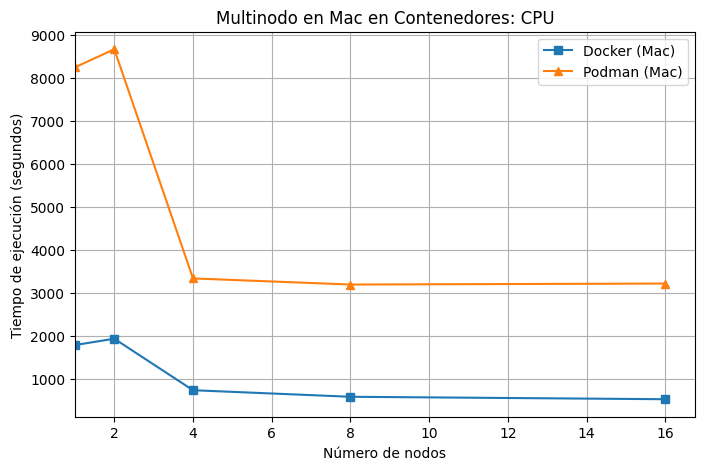

In [408]:
# Filtrar ejecuciones con 1 hebra por nodo (toma todos los valores de nodes)
df_mac_docker_multi_node = df_mac_docker[df_mac_docker['threads'] == 1].copy()
df_mac_podman_multi_node = df_mac_podman[df_mac_podman['threads'] == 1].copy()

# Convertir la columna 'time' a segundos
df_mac_docker_multi_node['time_seconds'] = df_mac_docker_multi_node['time'].apply(time_to_seconds)
df_mac_podman_multi_node['time_seconds'] = df_mac_podman_multi_node['time'].apply(time_to_seconds)

# Graficar: tiempo de ejecución vs número de nodos (Mac, multinodo, 1 hebra por nodo)
plt.figure(figsize=(8, 5))
plt.plot(df_mac_docker_multi_node['nodes'], df_mac_docker_multi_node['time_seconds'], marker='s', label='Docker (Mac)')
plt.plot(df_mac_podman_multi_node['nodes'], df_mac_podman_multi_node['time_seconds'], marker='^', label='Podman (Mac)')
plt.xlabel('Número de nodos')
plt.ylabel('Tiempo de ejecución (segundos)')
plt.title('Multinodo en Mac en Contenedores: CPU')
plt.legend()
plt.grid(True)
plt.xlim(left=1)
plt.show()

In [409]:
# Comparativa en tabla: tiempo de ejecución vs número de nodos (Mac, multinodo, 1 hebra por nodo)
table_mac_multi_node = pd.DataFrame({
    'Nodos': df_mac_docker_multi_node['nodes'].values,
    'Docker (Mac) (s)': df_mac_docker_multi_node['time_seconds'].values,
    'Podman (Mac) (s)': df_mac_podman_multi_node['time_seconds'].values,
    'Podman Δ%': 100 * (df_mac_podman_multi_node['time_seconds'].values - df_mac_docker_multi_node['time_seconds'].values) / df_mac_docker_multi_node['time_seconds'].values
})

display(Markdown(table_mac_multi_node.to_markdown(index=False, floatfmt=".2f")))

|   Nodos |   Docker (Mac) (s) |   Podman (Mac) (s) |   Podman Δ% |
|--------:|-------------------:|-------------------:|------------:|
|    1.00 |            1794.98 |            8247.00 |      359.45 |
|    2.00 |            1942.42 |            8668.00 |      346.25 |
|    4.00 |             745.84 |            3343.15 |      348.24 |
|    8.00 |             593.47 |            3201.07 |      439.38 |
|   16.00 |             536.60 |            3223.98 |      500.82 |

# Barrido de Hebras


## Ejecución Nativa


### CPU


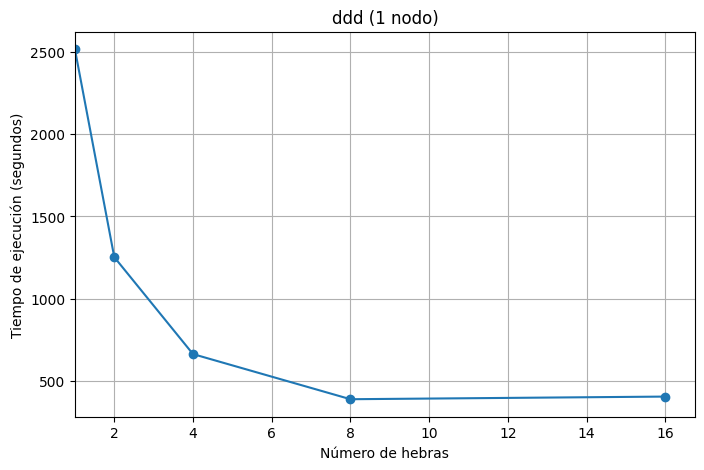

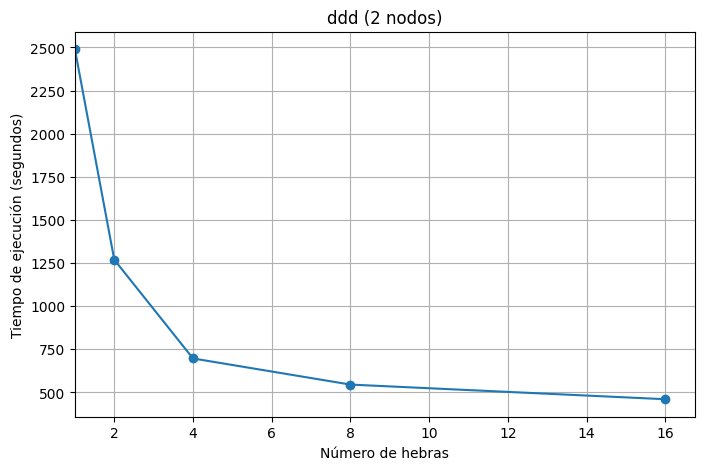

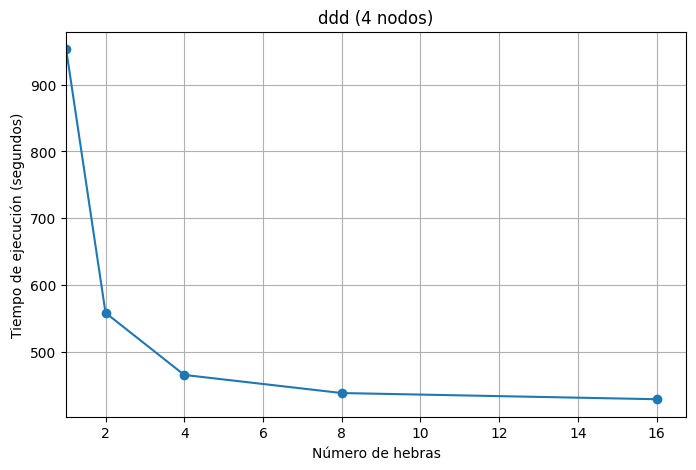

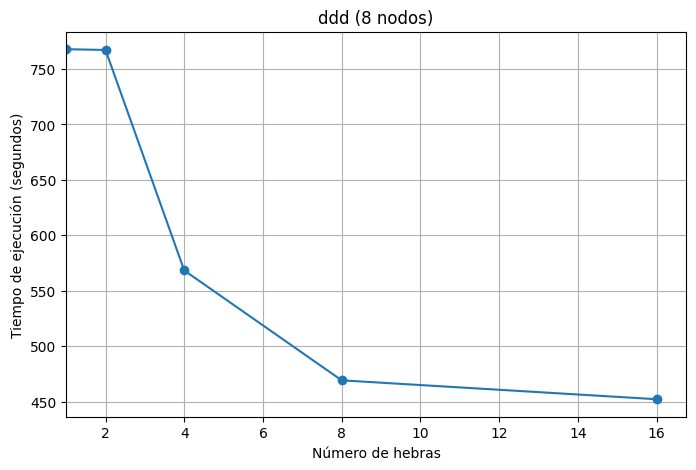

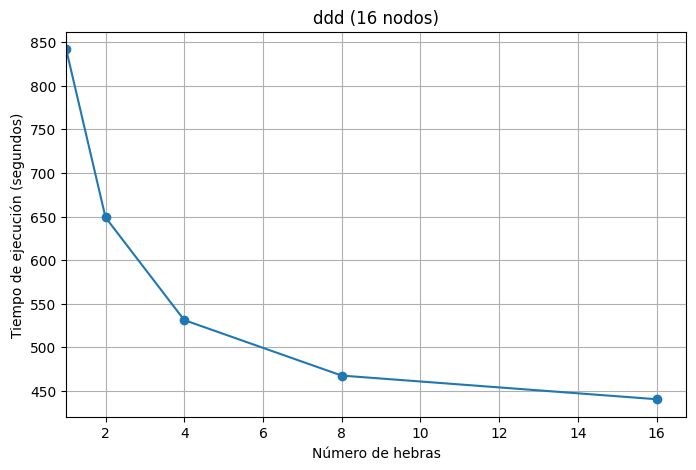

In [410]:
# Graficar: Tiempo de ejecución vs número de hebras para cada número de nodos (solo CPU, nativo)
for n_nodes in sorted(df_ubuntu_native['nodes'].unique()):
    df_n = df_ubuntu_native[df_ubuntu_native['nodes'] == n_nodes].copy()
    df_n['time_seconds'] = df_n['time'].apply(time_to_seconds)
    plt.figure(figsize=(8, 5))
    plt.plot(df_n['threads'], df_n['time_seconds'], marker='o')
    plt.xlabel('Número de hebras')
    plt.ylabel('Tiempo de ejecución (segundos)')
    plt.title(f'ddd ({n_nodes} nodo{"s" if n_nodes > 1 else ""})')
    plt.grid(True)
    plt.xlim(left=1)
    plt.show()

In [411]:
for n_nodes in sorted(df_ubuntu_native['nodes'].unique()):
    df_n = df_ubuntu_native[df_ubuntu_native['nodes'] == n_nodes].copy()
    df_n['time_seconds'] = df_n['time'].apply(time_to_seconds)
    ref = df_n[df_n['threads'] == 1]['time_seconds']
    if ref.empty:
        continue
    ref_time = ref.values[0]
    df_n['Δ% vs 1 hebra'] = 100 * (df_n['time_seconds'] - ref_time) / ref_time
    table = df_n[['threads', 'time_seconds', 'Δ% vs 1 hebra']].rename(
        columns={'threads': 'Hebras', 'time_seconds': 'Tiempo de ejecución (s)'}
    ).sort_values('Hebras')
    display(Markdown(f"### {n_nodes} nodo{'s' if n_nodes > 1 else ''}"))
    display(Markdown(table.to_markdown(index=False, floatfmt=".2f")))

### 1 nodo

|   Hebras |   Tiempo de ejecución (s) |   Δ% vs 1 hebra |
|---------:|--------------------------:|----------------:|
|     1.00 |                   2515.21 |            0.00 |
|     2.00 |                   1253.18 |          -50.18 |
|     4.00 |                    664.69 |          -73.57 |
|     8.00 |                    390.72 |          -84.47 |
|    16.00 |                    406.76 |          -83.83 |

### 2 nodos

|   Hebras |   Tiempo de ejecución (s) |   Δ% vs 1 hebra |
|---------:|--------------------------:|----------------:|
|     1.00 |                   2489.49 |            0.00 |
|     2.00 |                   1269.36 |          -49.01 |
|     4.00 |                    697.22 |          -71.99 |
|     8.00 |                    545.73 |          -78.08 |
|    16.00 |                    460.89 |          -81.49 |

### 4 nodos

|   Hebras |   Tiempo de ejecución (s) |   Δ% vs 1 hebra |
|---------:|--------------------------:|----------------:|
|     1.00 |                    952.85 |            0.00 |
|     2.00 |                    558.59 |          -41.38 |
|     4.00 |                    465.64 |          -51.13 |
|     8.00 |                    438.55 |          -53.97 |
|    16.00 |                    429.30 |          -54.95 |

### 8 nodos

|   Hebras |   Tiempo de ejecución (s) |   Δ% vs 1 hebra |
|---------:|--------------------------:|----------------:|
|     1.00 |                    767.87 |            0.00 |
|     2.00 |                    767.21 |           -0.09 |
|     4.00 |                    568.34 |          -25.98 |
|     8.00 |                    469.23 |          -38.89 |
|    16.00 |                    452.19 |          -41.11 |

### 16 nodos

|   Hebras |   Tiempo de ejecución (s) |   Δ% vs 1 hebra |
|---------:|--------------------------:|----------------:|
|     1.00 |                    841.96 |            0.00 |
|     2.00 |                    649.02 |          -22.92 |
|     4.00 |                    531.22 |          -36.91 |
|     8.00 |                    467.56 |          -44.47 |
|    16.00 |                    440.44 |          -47.69 |

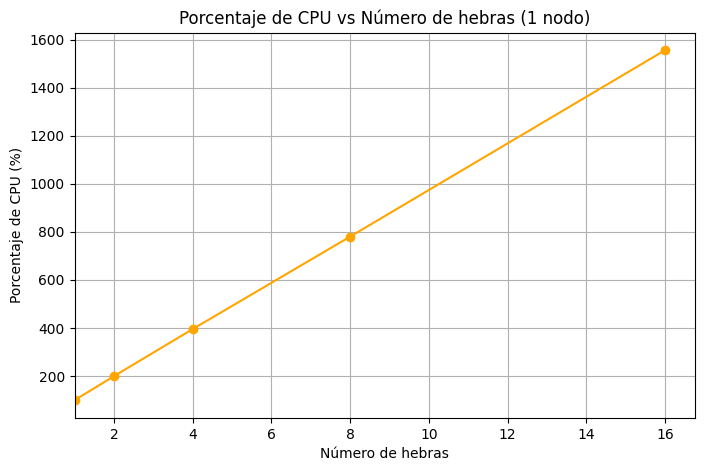

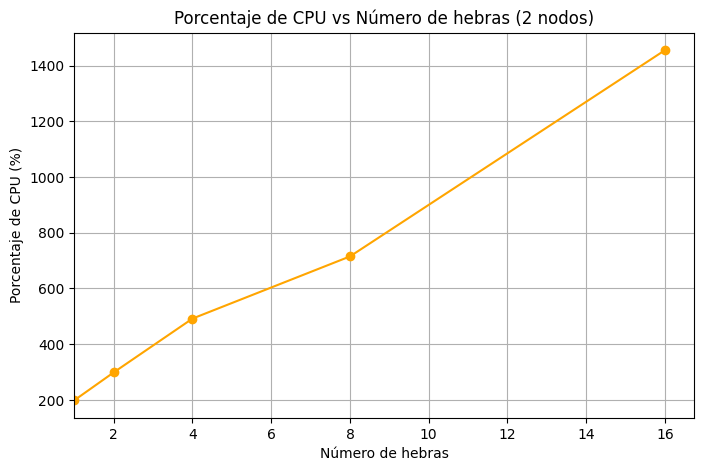

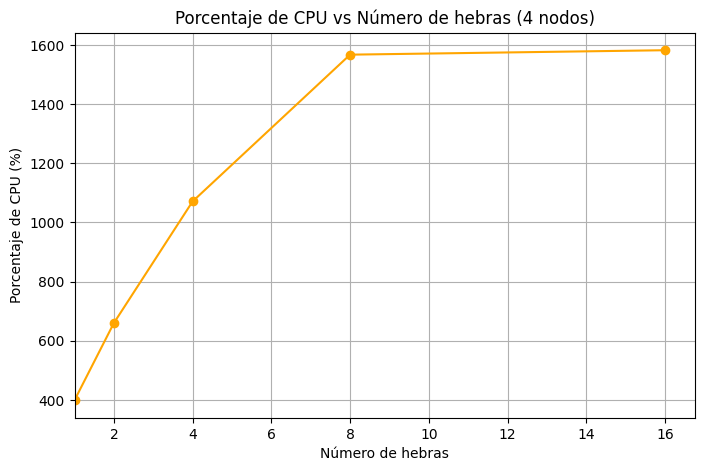

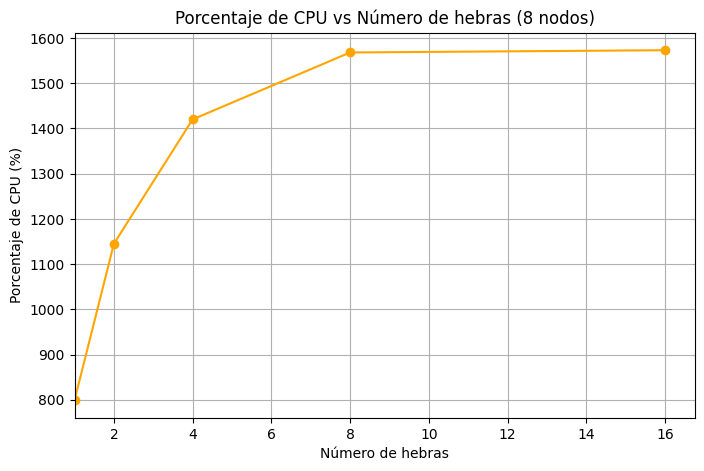

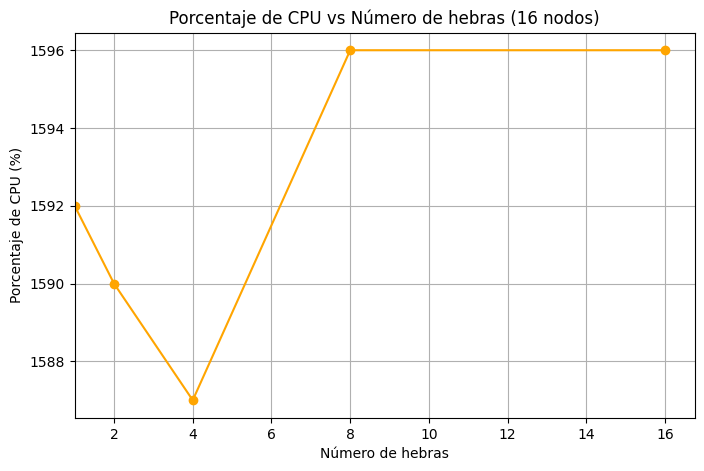

In [412]:
for n_nodes in sorted(df_ubuntu_native['nodes'].unique()):
    df_n = df_ubuntu_native[df_ubuntu_native['nodes'] == n_nodes].copy()
    if df_n.empty:
        continue
    plt.figure(figsize=(8, 5))
    plt.plot(df_n['threads'], df_n['cpu_percentage'], marker='o', color='orange')
    plt.xlabel('Número de hebras')
    plt.ylabel('Porcentaje de CPU (%)')
    plt.title(f'Porcentaje de CPU vs Número de hebras ({n_nodes} nodo{"s" if n_nodes > 1 else ""})')
    plt.grid(True)
    plt.xlim(left=1)
    plt.show()

In [413]:
for n_nodes in sorted(df_ubuntu_native['nodes'].unique()):
    df_n = df_ubuntu_native[df_ubuntu_native['nodes'] == n_nodes].copy()
    if df_n.empty:
        continue
    df_n['Max uso CPU (%)'] = df_n['threads'] * 100
    df_n['Eficiencia CPU (%)'] = 100 * df_n['cpu_percentage'] / df_n['Max uso CPU (%)']
    table = df_n[['threads', 'cpu_percentage', 'Max uso CPU (%)', 'Eficiencia CPU (%)']].rename(
        columns={
            'threads': 'Hebras',
            'cpu_percentage': 'Porcentaje de CPU (%)'
        }
    ).sort_values('Hebras')
    display(Markdown(f"### {n_nodes} nodo{'s' if n_nodes > 1 else ''}"))
    display(Markdown(table.to_markdown(index=False, floatfmt=".2f")))

### 1 nodo

|   Hebras |   Porcentaje de CPU (%) |   Max uso CPU (%) |   Eficiencia CPU (%) |
|---------:|------------------------:|------------------:|---------------------:|
|     1.00 |                   99.00 |            100.00 |                99.00 |
|     2.00 |                  199.00 |            200.00 |                99.50 |
|     4.00 |                  395.00 |            400.00 |                98.75 |
|     8.00 |                  780.00 |            800.00 |                97.50 |
|    16.00 |                 1556.00 |           1600.00 |                97.25 |

### 2 nodos

|   Hebras |   Porcentaje de CPU (%) |   Max uso CPU (%) |   Eficiencia CPU (%) |
|---------:|------------------------:|------------------:|---------------------:|
|     1.00 |                  199.00 |            100.00 |               199.00 |
|     2.00 |                  299.00 |            200.00 |               149.50 |
|     4.00 |                  492.00 |            400.00 |               123.00 |
|     8.00 |                  715.00 |            800.00 |                89.38 |
|    16.00 |                 1455.00 |           1600.00 |                90.94 |

### 4 nodos

|   Hebras |   Porcentaje de CPU (%) |   Max uso CPU (%) |   Eficiencia CPU (%) |
|---------:|------------------------:|------------------:|---------------------:|
|     1.00 |                  399.00 |            100.00 |               399.00 |
|     2.00 |                  660.00 |            200.00 |               330.00 |
|     4.00 |                 1071.00 |            400.00 |               267.75 |
|     8.00 |                 1567.00 |            800.00 |               195.88 |
|    16.00 |                 1582.00 |           1600.00 |                98.88 |

### 8 nodos

|   Hebras |   Porcentaje de CPU (%) |   Max uso CPU (%) |   Eficiencia CPU (%) |
|---------:|------------------------:|------------------:|---------------------:|
|     1.00 |                  799.00 |            100.00 |               799.00 |
|     2.00 |                 1145.00 |            200.00 |               572.50 |
|     4.00 |                 1420.00 |            400.00 |               355.00 |
|     8.00 |                 1568.00 |            800.00 |               196.00 |
|    16.00 |                 1573.00 |           1600.00 |                98.31 |

### 16 nodos

|   Hebras |   Porcentaje de CPU (%) |   Max uso CPU (%) |   Eficiencia CPU (%) |
|---------:|------------------------:|------------------:|---------------------:|
|     1.00 |                 1592.00 |            100.00 |              1592.00 |
|     2.00 |                 1590.00 |            200.00 |               795.00 |
|     4.00 |                 1587.00 |            400.00 |               396.75 |
|     8.00 |                 1596.00 |            800.00 |               199.50 |
|    16.00 |                 1596.00 |           1600.00 |                99.75 |

### CPU + GPU


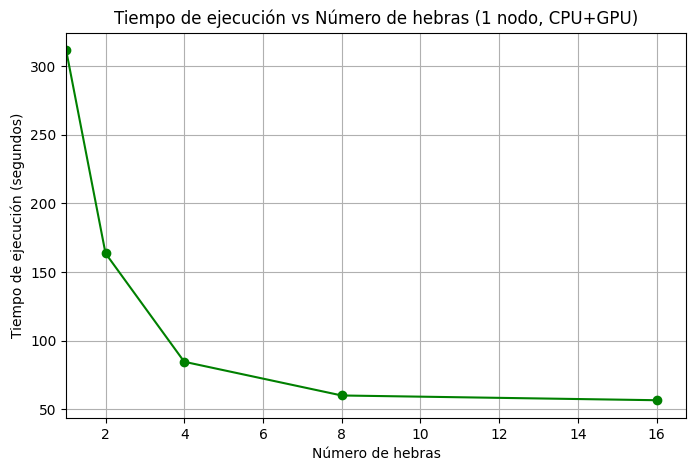

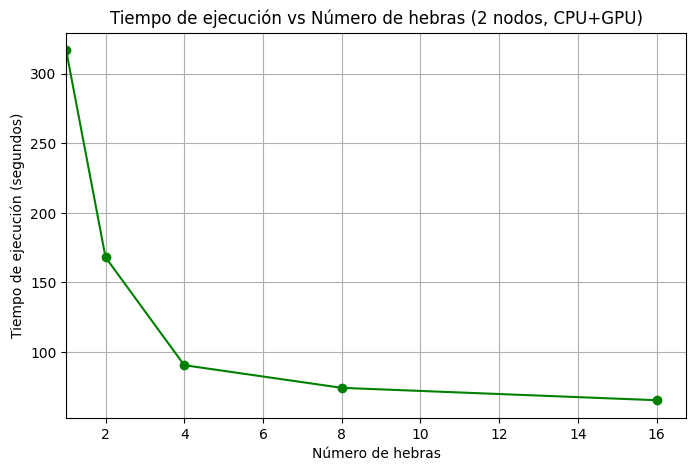

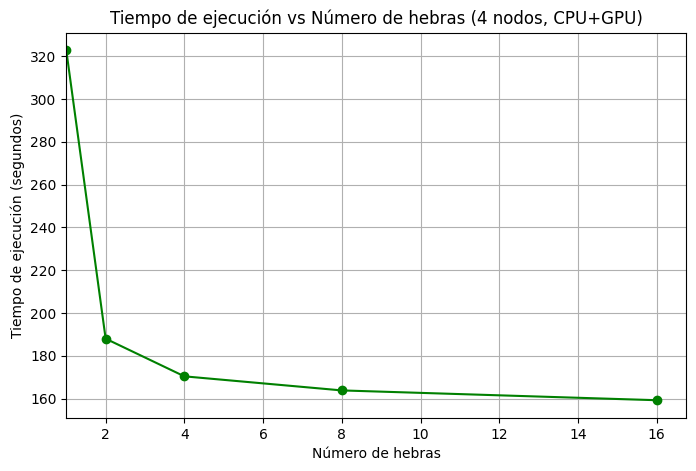

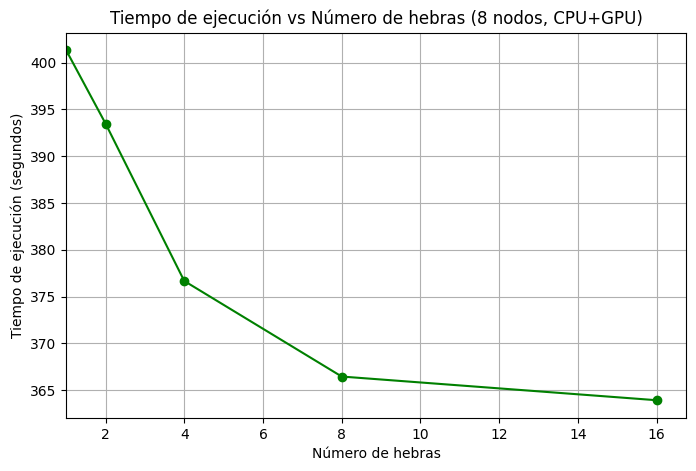

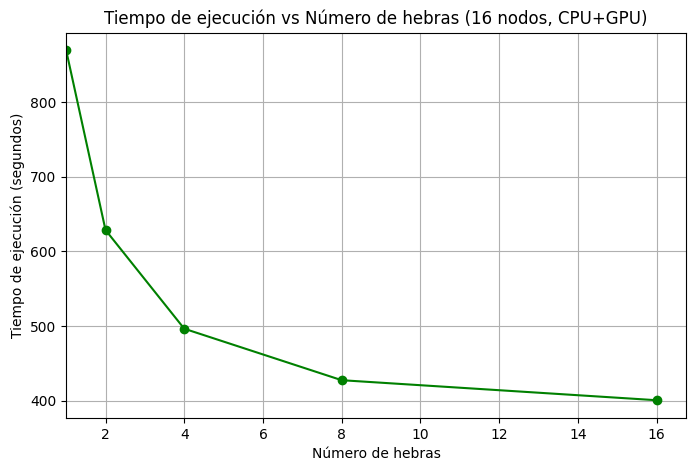

In [414]:
# Graficar: Tiempo de ejecución vs número de hebras para cada número de nodos (CPU+GPU, nativo)
for n_nodes in sorted(df_ubuntu_native_gpu['nodes'].unique()):
    df_n = df_ubuntu_native_gpu[df_ubuntu_native_gpu['nodes'] == n_nodes].copy()
    df_n['time_seconds'] = df_n['time'].apply(time_to_seconds)
    plt.figure(figsize=(8, 5))
    plt.plot(df_n['threads'], df_n['time_seconds'], marker='o', color='green')
    plt.xlabel('Número de hebras')
    plt.ylabel('Tiempo de ejecución (segundos)')
    plt.title(f'Tiempo de ejecución vs Número de hebras ({n_nodes} nodo{"s" if n_nodes > 1 else ""}, CPU+GPU)')
    plt.grid(True)
    plt.xlim(left=1)
    plt.show()

In [415]:
for n_nodes in sorted(df_ubuntu_native_gpu['nodes'].unique()):
    df_n = df_ubuntu_native_gpu[df_ubuntu_native_gpu['nodes'] == n_nodes].copy()
    df_n['time_seconds'] = df_n['time'].apply(time_to_seconds)
    ref = df_n[df_n['threads'] == 1]['time_seconds']
    if ref.empty:
        continue
    ref_time = ref.values[0]
    df_n['Δ% vs 1 hebra'] = 100 * (df_n['time_seconds'] - ref_time) / ref_time
    table = df_n[['threads', 'time_seconds', 'Δ% vs 1 hebra']].rename(
        columns={'threads': 'Hebras', 'time_seconds': 'Tiempo de ejecución (s)'}
    ).sort_values('Hebras')
    display(Markdown(f"### {n_nodes} nodo{'s' if n_nodes > 1 else ''}"))
    display(Markdown(table.to_markdown(index=False, floatfmt=".2f")))

### 1 nodo

|   Hebras |   Tiempo de ejecución (s) |   Δ% vs 1 hebra |
|---------:|--------------------------:|----------------:|
|     1.00 |                    311.68 |            0.00 |
|     2.00 |                    163.59 |          -47.51 |
|     4.00 |                     84.49 |          -72.89 |
|     8.00 |                     59.91 |          -80.78 |
|    16.00 |                     56.45 |          -81.89 |

### 2 nodos

|   Hebras |   Tiempo de ejecución (s) |   Δ% vs 1 hebra |
|---------:|--------------------------:|----------------:|
|     1.00 |                    316.92 |            0.00 |
|     2.00 |                    168.14 |          -46.95 |
|     4.00 |                     90.58 |          -71.42 |
|     8.00 |                     74.30 |          -76.56 |
|    16.00 |                     65.40 |          -79.36 |

### 4 nodos

|   Hebras |   Tiempo de ejecución (s) |   Δ% vs 1 hebra |
|---------:|--------------------------:|----------------:|
|     1.00 |                    322.77 |            0.00 |
|     2.00 |                    187.98 |          -41.76 |
|     4.00 |                    170.38 |          -47.21 |
|     8.00 |                    163.80 |          -49.25 |
|    16.00 |                    159.22 |          -50.67 |

### 8 nodos

|   Hebras |   Tiempo de ejecución (s) |   Δ% vs 1 hebra |
|---------:|--------------------------:|----------------:|
|     1.00 |                    401.33 |            0.00 |
|     2.00 |                    393.50 |           -1.95 |
|     4.00 |                    376.68 |           -6.14 |
|     8.00 |                    366.47 |           -8.69 |
|    16.00 |                    363.94 |           -9.32 |

### 16 nodos

|   Hebras |   Tiempo de ejecución (s) |   Δ% vs 1 hebra |
|---------:|--------------------------:|----------------:|
|     1.00 |                    869.40 |            0.00 |
|     2.00 |                    628.49 |          -27.71 |
|     4.00 |                    496.28 |          -42.92 |
|     8.00 |                    427.30 |          -50.85 |
|    16.00 |                    400.48 |          -53.94 |

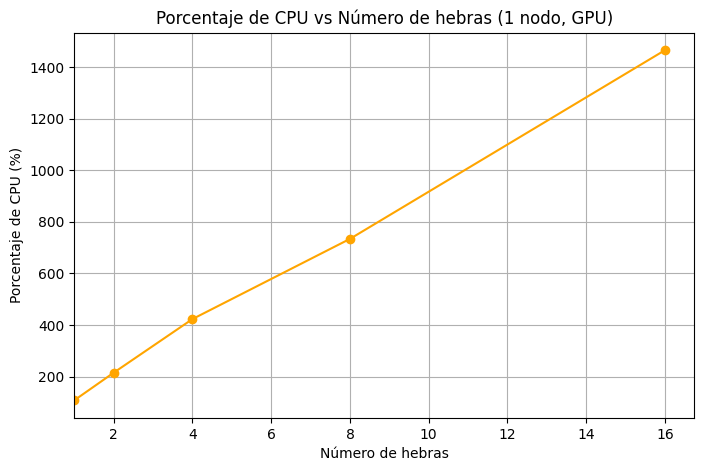

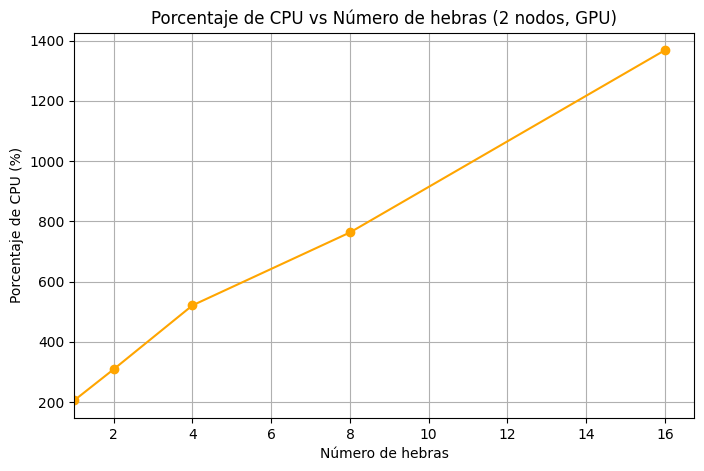

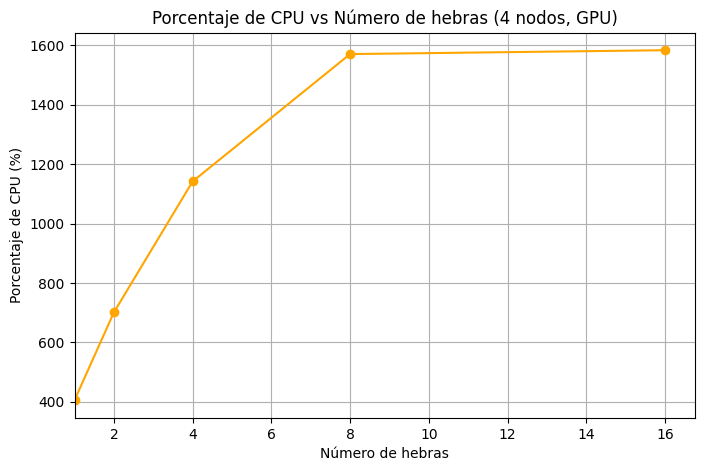

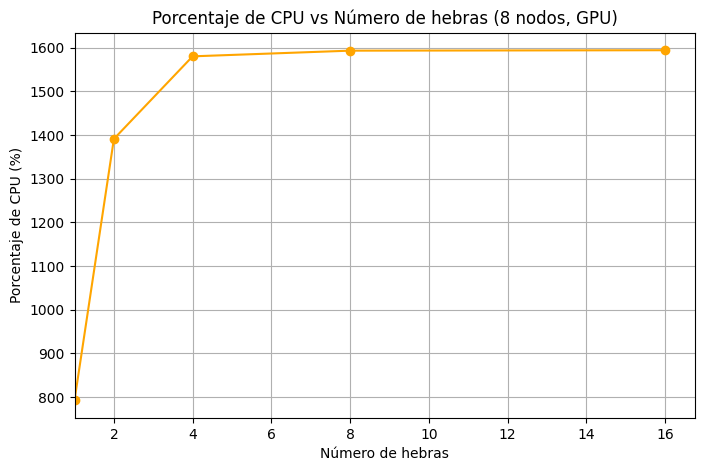

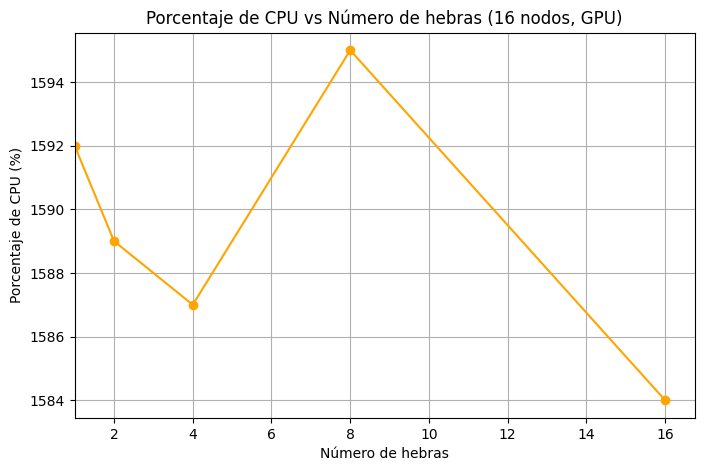

In [416]:
for n_nodes in sorted(df_ubuntu_native_gpu['nodes'].unique()):
    df_n = df_ubuntu_native_gpu[df_ubuntu_native_gpu['nodes'] == n_nodes].copy()
    if df_n.empty:
        continue
    plt.figure(figsize=(8, 5))
    plt.plot(df_n['threads'], df_n['cpu_percentage'], marker='o', color='orange')
    plt.xlabel('Número de hebras')
    plt.ylabel('Porcentaje de CPU (%)')
    plt.title(f'Porcentaje de CPU vs Número de hebras ({n_nodes} nodo{"s" if n_nodes > 1 else ""}, GPU)')
    plt.grid(True)
    plt.xlim(left=1)
    plt.show()

In [417]:
for n_nodes in sorted(df_ubuntu_native_gpu['nodes'].unique()):
    df_n = df_ubuntu_native_gpu[df_ubuntu_native_gpu['nodes'] == n_nodes].copy()
    if df_n.empty:
        continue
    df_n['Max uso CPU (%)'] = df_n['threads'] * 100
    df_n['Eficiencia CPU (%)'] = 100 * df_n['cpu_percentage'] / df_n['Max uso CPU (%)']
    table = df_n[['threads', 'cpu_percentage', 'Max uso CPU (%)', 'Eficiencia CPU (%)']].rename(
        columns={
            'threads': 'Hebras',
            'cpu_percentage': 'Porcentaje de CPU (%)'
        }
    ).sort_values('Hebras')
    display(Markdown(f"### {n_nodes} nodo{'s' if n_nodes > 1 else ''}"))
    display(Markdown(table.to_markdown(index=False, floatfmt=".2f")))

### 1 nodo

|   Hebras |   Porcentaje de CPU (%) |   Max uso CPU (%) |   Eficiencia CPU (%) |
|---------:|------------------------:|------------------:|---------------------:|
|     1.00 |                  108.00 |            100.00 |               108.00 |
|     2.00 |                  215.00 |            200.00 |               107.50 |
|     4.00 |                  423.00 |            400.00 |               105.75 |
|     8.00 |                  734.00 |            800.00 |                91.75 |
|    16.00 |                 1466.00 |           1600.00 |                91.62 |

### 2 nodos

|   Hebras |   Porcentaje de CPU (%) |   Max uso CPU (%) |   Eficiencia CPU (%) |
|---------:|------------------------:|------------------:|---------------------:|
|     1.00 |                  206.00 |            100.00 |               206.00 |
|     2.00 |                  309.00 |            200.00 |               154.50 |
|     4.00 |                  521.00 |            400.00 |               130.25 |
|     8.00 |                  763.00 |            800.00 |                95.38 |
|    16.00 |                 1368.00 |           1600.00 |                85.50 |

### 4 nodos

|   Hebras |   Porcentaje de CPU (%) |   Max uso CPU (%) |   Eficiencia CPU (%) |
|---------:|------------------------:|------------------:|---------------------:|
|     1.00 |                  405.00 |            100.00 |               405.00 |
|     2.00 |                  701.00 |            200.00 |               350.50 |
|     4.00 |                 1142.00 |            400.00 |               285.50 |
|     8.00 |                 1571.00 |            800.00 |               196.38 |
|    16.00 |                 1584.00 |           1600.00 |                99.00 |

### 8 nodos

|   Hebras |   Porcentaje de CPU (%) |   Max uso CPU (%) |   Eficiencia CPU (%) |
|---------:|------------------------:|------------------:|---------------------:|
|     1.00 |                  793.00 |            100.00 |               793.00 |
|     2.00 |                 1391.00 |            200.00 |               695.50 |
|     4.00 |                 1580.00 |            400.00 |               395.00 |
|     8.00 |                 1593.00 |            800.00 |               199.12 |
|    16.00 |                 1594.00 |           1600.00 |                99.62 |

### 16 nodos

|   Hebras |   Porcentaje de CPU (%) |   Max uso CPU (%) |   Eficiencia CPU (%) |
|---------:|------------------------:|------------------:|---------------------:|
|     1.00 |                 1592.00 |            100.00 |              1592.00 |
|     2.00 |                 1589.00 |            200.00 |               794.50 |
|     4.00 |                 1587.00 |            400.00 |               396.75 |
|     8.00 |                 1595.00 |            800.00 |               199.38 |
|    16.00 |                 1584.00 |           1600.00 |                99.00 |

## Ejecución en Contenedores en Nativo


### Solo CPU


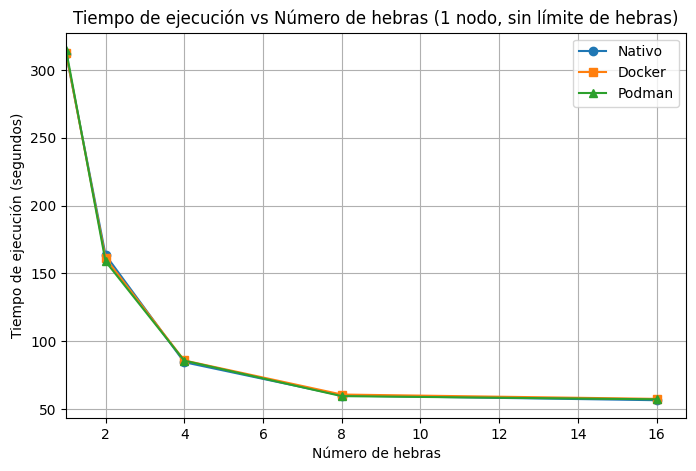

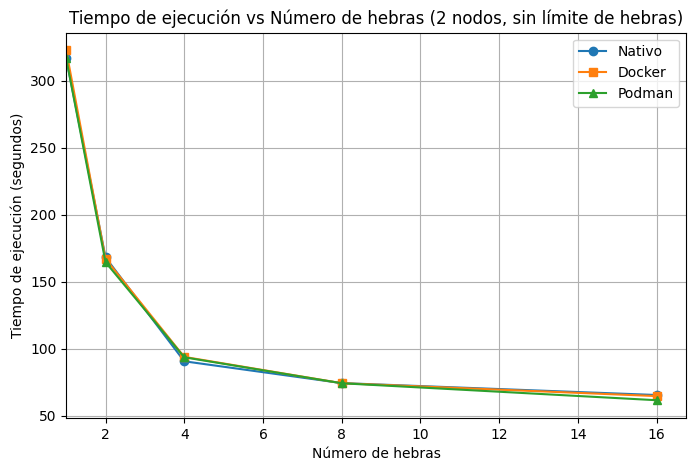

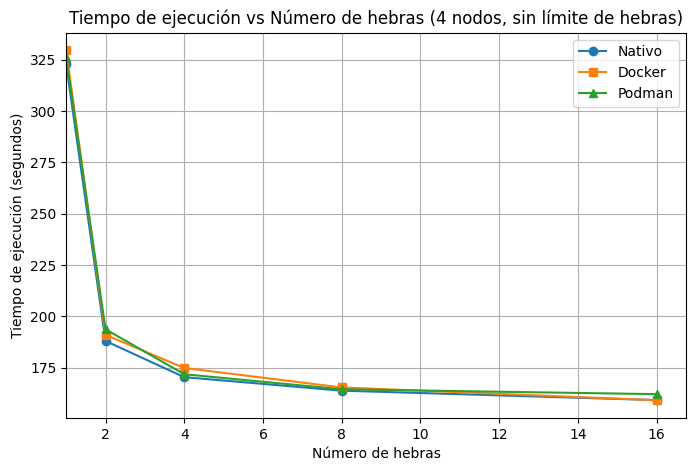

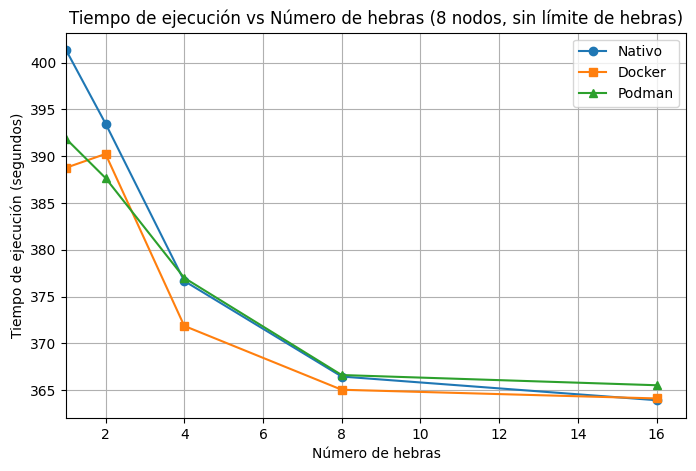

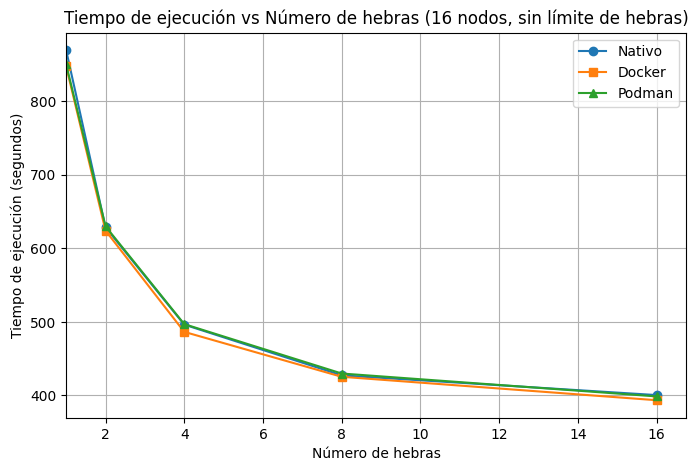

In [418]:
# Graficar tiempo de ejecución vs número de hebras para cada número de nodos (sin límite de hebras, CPU+GPU, Nativo, Docker y Podman)
for n_nodes in sorted(df_ubuntu_native_gpu['nodes'].unique()):
    df_native = df_ubuntu_native_gpu[df_ubuntu_native_gpu['nodes'] == n_nodes].copy()
    df_docker = df_ubuntu_docker_gpu[df_ubuntu_docker_gpu['nodes'] == n_nodes].copy()
    df_podman = df_ubuntu_podman_gpu[df_ubuntu_podman_gpu['nodes'] == n_nodes].copy()
    df_native['time_seconds'] = df_native['time'].apply(time_to_seconds)
    df_docker['time_seconds'] = df_docker['time'].apply(time_to_seconds)
    df_podman['time_seconds'] = df_podman['time'].apply(time_to_seconds)
    plt.figure(figsize=(8, 5))
    plt.plot(df_native['threads'], df_native['time_seconds'], marker='o', label='Nativo')
    plt.plot(df_docker['threads'], df_docker['time_seconds'], marker='s', label='Docker')
    plt.plot(df_podman['threads'], df_podman['time_seconds'], marker='^', label='Podman')
    plt.xlabel('Número de hebras')
    plt.ylabel('Tiempo de ejecución (segundos)')
    plt.title(f'Tiempo de ejecución vs Número de hebras ({n_nodes} nodo{"s" if n_nodes > 1 else ""}, sin límite de hebras)')
    plt.legend()
    plt.grid(True)
    plt.xlim(left=1)
    plt.show()

### CPU + GPU


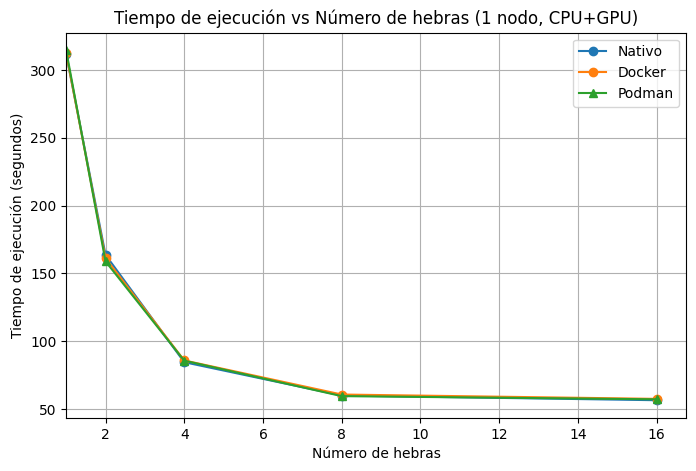

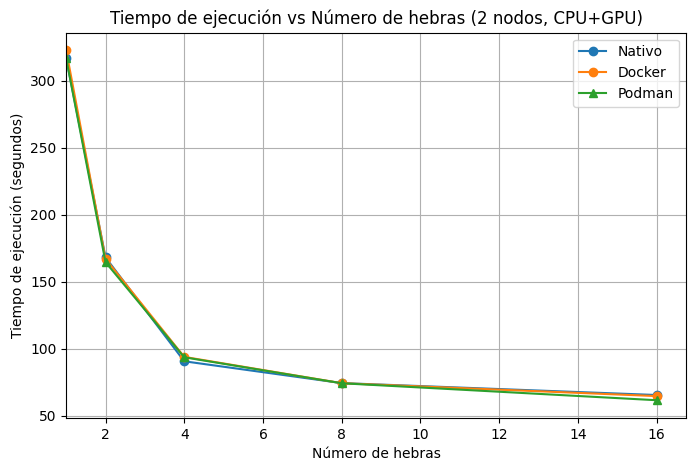

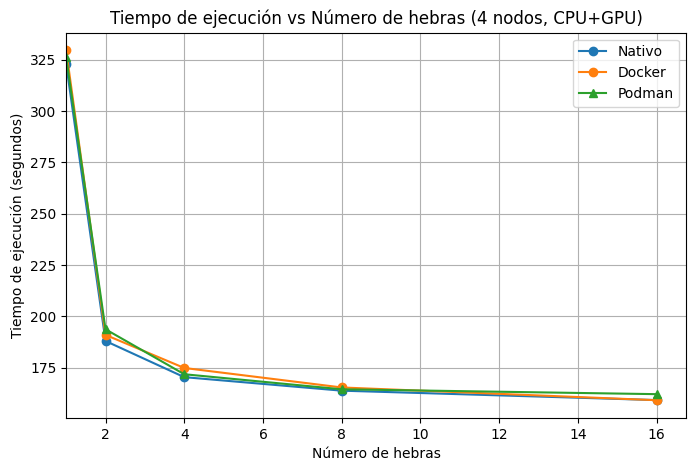

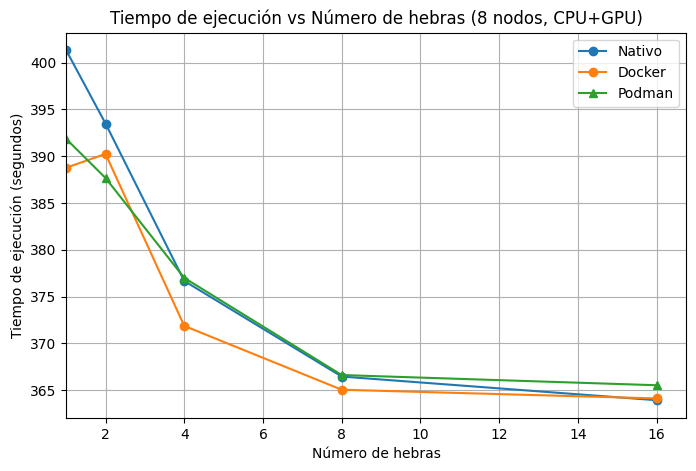

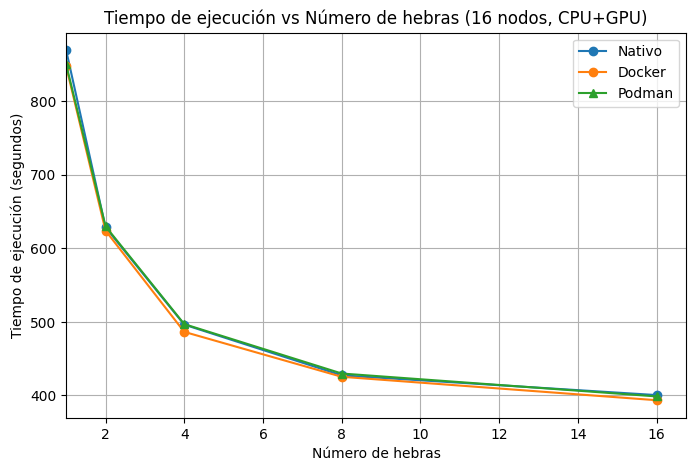

In [419]:
# Graficar tiempo de ejecución vs número de hebras para cada número de nodos (CPU+GPU, Nativo, Docker y Podman)
for n_nodes in sorted(df_ubuntu_native_gpu['nodes'].unique()):
    df_native = df_ubuntu_native_gpu[df_ubuntu_native_gpu['nodes'] == n_nodes].copy()
    df_docker = df_ubuntu_docker_gpu[df_ubuntu_docker_gpu['nodes'] == n_nodes].copy()
    df_podman = df_ubuntu_podman_gpu[df_ubuntu_podman_gpu['nodes'] == n_nodes].copy()
    df_native['time_seconds'] = df_native['time'].apply(time_to_seconds)
    df_docker['time_seconds'] = df_docker['time'].apply(time_to_seconds)
    df_podman['time_seconds'] = df_podman['time'].apply(time_to_seconds)
    plt.figure(figsize=(8, 5))
    plt.plot(df_native['threads'], df_native['time_seconds'], marker='o', label='Nativo')
    plt.plot(df_docker['threads'], df_docker['time_seconds'], marker='o', label='Docker')
    plt.plot(df_podman['threads'], df_podman['time_seconds'], marker='^', label='Podman')
    plt.xlabel('Número de hebras')
    plt.ylabel('Tiempo de ejecución (segundos)')
    plt.title(f'Tiempo de ejecución vs Número de hebras ({n_nodes} nodo{"s" if n_nodes > 1 else ""}, CPU+GPU)')
    plt.legend()
    plt.grid(True)
    plt.xlim(left=1)
    plt.show()

In [420]:
# Mostrar tablas comparativas en Markdown para cada número de nodos (CPU+GPU)
for n_nodes in sorted(df_ubuntu_native_gpu['nodes'].unique()):
    df_native = df_ubuntu_native_gpu[df_ubuntu_native_gpu['nodes'] == n_nodes].copy()
    df_docker = df_ubuntu_docker_gpu[df_ubuntu_docker_gpu['nodes'] == n_nodes].copy()
    df_podman = df_ubuntu_podman_gpu[df_ubuntu_podman_gpu['nodes'] == n_nodes].copy()
    df_native['time_seconds'] = df_native['time'].apply(time_to_seconds)
    df_docker['time_seconds'] = df_docker['time'].apply(time_to_seconds)
    df_podman['time_seconds'] = df_podman['time'].apply(time_to_seconds)
    tabla = pd.DataFrame({
        'Hebras': df_native['threads'],
        'Nativo (s)': df_native['time_seconds'].values,
        'Docker (s)': df_docker['time_seconds'].values,
        'Docker Δ%': 100 * (df_docker['time_seconds'].values - df_native['time_seconds'].values) / df_native['time_seconds'].values,
        'Podman (s)': df_podman['time_seconds'].values,
        'Podman Δ%': 100 * (df_podman['time_seconds'].values - df_native['time_seconds'].values) / df_native['time_seconds'].values
    })
    display(Markdown(f"### {n_nodes} nodo{'s' if n_nodes > 1 else ''}"))
    display(Markdown(tabla.to_markdown(index=False, floatfmt=".2f")))

### 1 nodo

|   Hebras |   Nativo (s) |   Docker (s) |   Docker Δ% |   Podman (s) |   Podman Δ% |
|---------:|-------------:|-------------:|------------:|-------------:|------------:|
|     1.00 |       311.68 |       312.18 |        0.16 |       314.51 |        0.91 |
|     2.00 |       163.59 |       161.10 |       -1.52 |       158.84 |       -2.90 |
|     4.00 |        84.49 |        85.78 |        1.53 |        85.62 |        1.34 |
|     8.00 |        59.91 |        60.65 |        1.24 |        59.47 |       -0.73 |
|    16.00 |        56.45 |        57.45 |        1.77 |        57.12 |        1.19 |

### 2 nodos

|   Hebras |   Nativo (s) |   Docker (s) |   Docker Δ% |   Podman (s) |   Podman Δ% |
|---------:|-------------:|-------------:|------------:|-------------:|------------:|
|     1.00 |       316.92 |       322.77 |        1.85 |       316.80 |       -0.04 |
|     2.00 |       168.14 |       166.99 |       -0.68 |       164.58 |       -2.12 |
|     4.00 |        90.58 |        93.85 |        3.61 |        93.56 |        3.29 |
|     8.00 |        74.30 |        74.22 |       -0.11 |        74.18 |       -0.16 |
|    16.00 |        65.40 |        64.60 |       -1.22 |        61.51 |       -5.95 |

### 4 nodos

|   Hebras |   Nativo (s) |   Docker (s) |   Docker Δ% |   Podman (s) |   Podman Δ% |
|---------:|-------------:|-------------:|------------:|-------------:|------------:|
|     1.00 |       322.77 |       329.54 |        2.10 |       326.20 |        1.06 |
|     2.00 |       187.98 |       190.95 |        1.58 |       193.69 |        3.04 |
|     4.00 |       170.38 |       174.85 |        2.62 |       171.80 |        0.83 |
|     8.00 |       163.80 |       165.36 |        0.95 |       164.47 |        0.41 |
|    16.00 |       159.22 |       159.15 |       -0.04 |       162.10 |        1.81 |

### 8 nodos

|   Hebras |   Nativo (s) |   Docker (s) |   Docker Δ% |   Podman (s) |   Podman Δ% |
|---------:|-------------:|-------------:|------------:|-------------:|------------:|
|     1.00 |       401.33 |       388.78 |       -3.13 |       391.86 |       -2.36 |
|     2.00 |       393.50 |       390.25 |       -0.83 |       387.68 |       -1.48 |
|     4.00 |       376.68 |       371.88 |       -1.27 |       377.01 |        0.09 |
|     8.00 |       366.47 |       365.06 |       -0.38 |       366.63 |        0.04 |
|    16.00 |       363.94 |       364.13 |        0.05 |       365.54 |        0.44 |

### 16 nodos

|   Hebras |   Nativo (s) |   Docker (s) |   Docker Δ% |   Podman (s) |   Podman Δ% |
|---------:|-------------:|-------------:|------------:|-------------:|------------:|
|     1.00 |       869.40 |       847.37 |       -2.53 |       850.18 |       -2.21 |
|     2.00 |       628.49 |       624.14 |       -0.69 |       629.92 |        0.23 |
|     4.00 |       496.28 |       486.42 |       -1.99 |       496.97 |        0.14 |
|     8.00 |       427.30 |       425.37 |       -0.45 |       429.80 |        0.59 |
|    16.00 |       400.48 |       393.49 |       -1.75 |       398.66 |       -0.45 |

## Ejecución en Contenedores en Windows


### Solo CPU


### CPU + GPU


## Ejecución en Contenedores en Mac


### Solo CPU


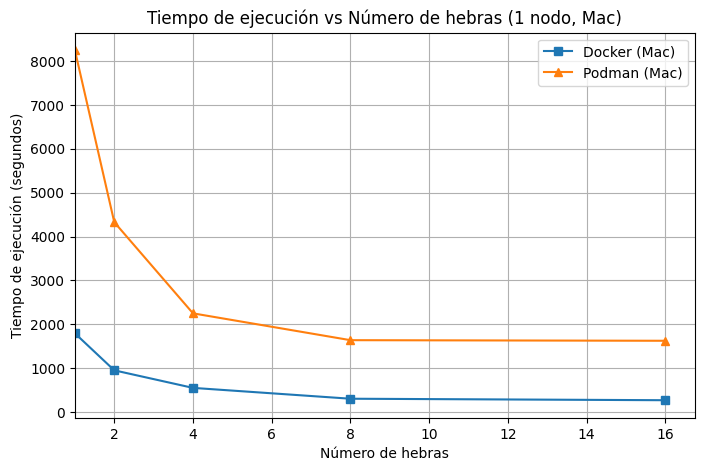

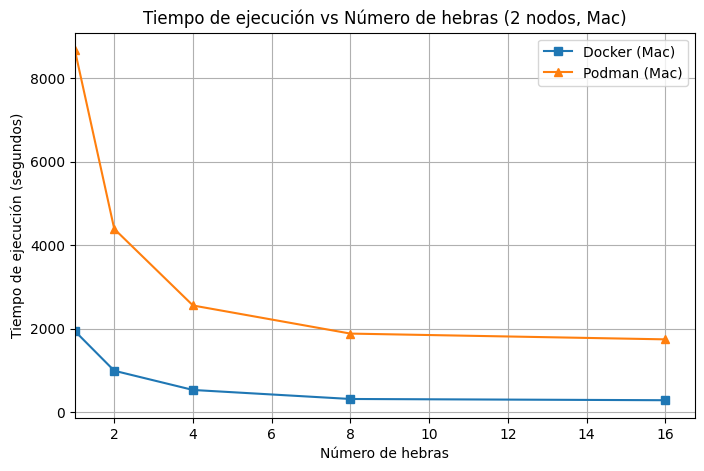

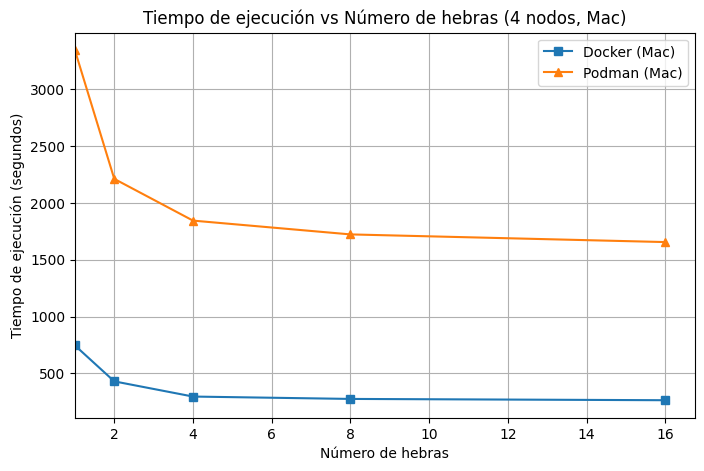

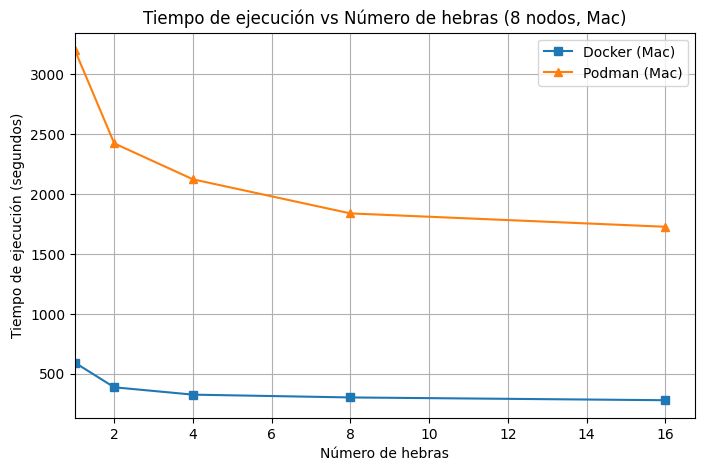

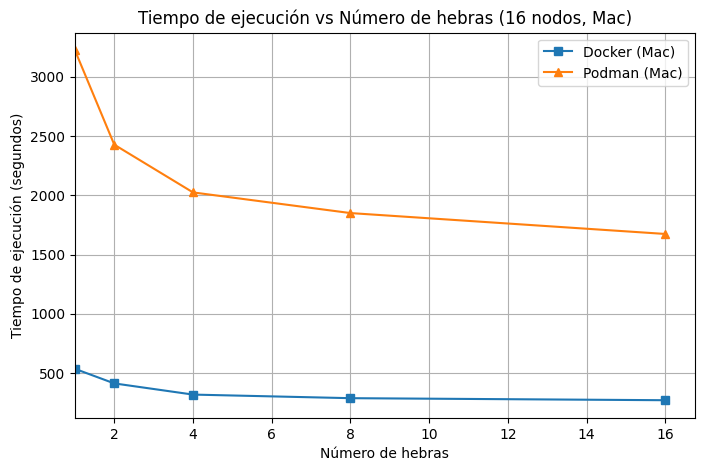

In [421]:
# Graficar: tiempo de ejecución vs número de hebras para cada número de nodos (sin límite de hebras, Mac, multinodo)
for n_nodes in sorted(df_mac_docker['nodes'].unique()):
    df_docker = df_mac_docker[df_mac_docker['nodes'] == n_nodes].copy()
    df_podman = df_mac_podman[df_mac_podman['nodes'] == n_nodes].copy()
    df_docker['time_seconds'] = df_docker['time'].apply(time_to_seconds)
    df_podman['time_seconds'] = df_podman['time'].apply(time_to_seconds)
    plt.figure(figsize=(8, 5))
    plt.plot(df_docker['threads'], df_docker['time_seconds'], marker='s', label='Docker (Mac)')
    plt.plot(df_podman['threads'], df_podman['time_seconds'], marker='^', label='Podman (Mac)')
    plt.xlabel('Número de hebras')
    plt.ylabel('Tiempo de ejecución (segundos)')
    plt.title(f'Tiempo de ejecución vs Número de hebras ({n_nodes} nodo{"s" if n_nodes > 1 else ""}, Mac)')
    plt.legend()
    plt.grid(True)
    plt.xlim(left=1)
    plt.show()